# 📝 **Automated Customer Reviews Classification**
### **Ironhack Data Science and Machine Learning Bootcamp**
📅 **Date:** January 30, 2025  
📅 **Submission Date:** January 31, 2025  
👩‍💻 **Authors:** Ginosca Alejandro Dávila & Natanael Santiago Morales  

---

## **📌 Project Overview**
This project aims to classify customer reviews from **Amazon US Reviews** into one of three sentiment categories:
- **Positive** (⭐ 5 stars)
- **Neutral** (⭐ 4 stars)
- **Negative** (⭐ 1, 2, or 3 stars)

To achieve this, we will compare **traditional Machine Learning models** (e.g., Naive Bayes, SVM, Random Forest) against **Deep Learning models** (e.g., Transformers from Hugging Face).

Additionally, we will generate **summaries** of reviews grouped by product categories and sentiment ratings.

---

## **📂 Dataset Description**
- **Source:** [Consumer Reviews of Amazon Products (Kaggle)](https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/data)  
- **Format:** CSV file containing customer reviews, star ratings (1-5), product categories, and metadata.  
- **Transformation:** Ratings are mapped as follows:  
  - **1, 2, 3 → Negative**  
  - **4 → Neutral**  
  - **5 → Positive**  

---

## **🎯 Goals**
✔ Train and compare **ML & Transformer-based models** for review classification.  
✔ Evaluate model performance using **accuracy, precision, recall, and F1-score**.  
✔ Generate **review summaries** for top product categories (Bonus).  
✔ Create **visual dashboards** for insights using Plotly/Tableau (Bonus).  

---

## **💾 Project Structure**
📂 `Colab Notebooks/NLP Project - Automated Customers Reviews` → Project folder  
📂 `nlp_customer_reviews_classification.ipynb` → Notebook for development  
📂 `models/` → Folder to store the best trained models inside Google Drive  

---

🔹 **Let's get started! 🚀**


## 📌 **Ensuring NLTK is Installed and Configured**
Before proceeding, we must ensure:
1. **NLTK is installed and up to date**.
2. **NLTK resources (`punkt`, `stopwords`, `wordnet`, `punkt_tab`) are available**.
3. **NLTK paths are correctly set to prevent missing resource errors**.

💡 If the runtime is disconnected, these steps ensure everything works correctly.  
🚀 **Let’s start by reinstalling NLTK and clearing cached resources.**


In [1]:
# 🛠 **Step 1: Uninstall and Install NLTK (Restart Required)**
!pip uninstall -y nltk
!rm -rf /root/nltk_data
!rm -rf /usr/local/nltk_data
!rm -rf /usr/share/nltk_data
!rm -rf /usr/lib/nltk_data
!rm -rf /usr/local/lib/nltk_data
print("✅ NLTK and all cached data removed.")

# Reinstall NLTK
!pip install --no-cache-dir nltk
print("✅ NLTK reinstalled successfully.")

# 🚨 **IMPORTANT:** Restart the runtime before continuing!


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
✅ NLTK and all cached data removed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.3 MB/s eta 0:00:00
✅ NLTK reinstalled successfully.


## ✅ **Restart Runtime Before Continuing**
🚨 **IMPORTANT:**  
After uninstalling and reinstalling NLTK, you must **restart the runtime** before proceeding.

📌 **Next Step:**  
Once the runtime is restarted, continue by running the next cell to re-download required NLTK resources.


In [1]:
# 🛠 **Step 2: Ensure NLTK Resources Are Available**
import os
import nltk

# Explicitly set the data path
nltk.data.path.append("/root/nltk_data")

# Download required resources
nltk.download("punkt", force=True)
nltk.download("stopwords", force=True)
nltk.download("wordnet", force=True)
nltk.download("punkt_tab", force=True)  # Ensure punkt_tab is available

print("✅ Required NLTK resources re-downloaded successfully.")

# Verify tokenizer exists
tokenizer_path = "/root/nltk_data/tokenizers/punkt"
if os.path.exists(tokenizer_path):
    print("✅ Punkt tokenizer is installed correctly.")
    print("Available files:", os.listdir(tokenizer_path))
else:
    print("❌ Punkt tokenizer is missing. Something went wrong.")

print("✅ NLTK paths set manually:", nltk.data.path)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


✅ Required NLTK resources re-downloaded successfully.
✅ Punkt tokenizer is installed correctly.
Available files: ['README', 'greek.pickle', 'turkish.pickle', 'italian.pickle', 'russian.pickle', 'german.pickle', 'portuguese.pickle', 'malayalam.pickle', 'polish.pickle', 'estonian.pickle', 'danish.pickle', 'dutch.pickle', 'finnish.pickle', 'norwegian.pickle', 'french.pickle', 'swedish.pickle', '.DS_Store', 'slovene.pickle', 'czech.pickle', 'english.pickle', 'PY3', 'spanish.pickle']
✅ NLTK paths set manually: ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/root/nltk_data']


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## ✅ **NLTK Resources Verified**
All required NLTK resources have been successfully downloaded and verified.

✔️ **NLTK paths set manually**  
✔️ **Punkt tokenizer is installed correctly**  
✔️ **`punkt_tab`, `stopwords`, and `wordnet` are available**  

📌 **Next Step:**  
Now, we will load the dataset directly from **Hugging Face** using the `datasets` library.


## 📥 **Downloading Amazon US Reviews Dataset from Kaggle**
We will:
1. **Download the dataset** from Kaggle using `kagglehub`.
2. **Explore its structure** to understand available columns and data format.
3. **Select relevant columns** (review text, star rating, product category).
4. **Prepare labels** by mapping ratings to **positive, neutral, or negative** sentiments.

🚀 **Let's begin!**


In [ ]:
import kagglehub

# Download latest version of the Kaggle dataset
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

print("✅ Dataset downloaded successfully!")
print("📂 Path to dataset files:", path)


100%|██████████| 16.3M/16.3M [00:00<00:00, 42.9MB/s]

Extracting files...


✅ Dataset downloaded successfully!
📂 Path to dataset files: /root/.cache/kagglehub/datasets/datafiniti/consumer-reviews-of-amazon-products/versions/5


## 📂 **Listing Available CSV Files**
The dataset folder contains multiple CSV files. We will:
1. **List all available files** in the extracted dataset folder.
2. **Preview the first few rows** of each file to determine which one contains:
   - **Customer reviews** (text column).
   - **Star ratings** (for sentiment classification).

🚀 **Let's inspect the files!**


In [ ]:
import os
import pandas as pd

# Define the dataset folder
dataset_folder = "/root/.cache/kagglehub/datasets/datafiniti/consumer-reviews-of-amazon-products/versions/5"

# List all available files in the dataset folder
files = os.listdir(dataset_folder)
print("📂 Available files:", files)

# Check for CSV files only
csv_files = [file for file in files if file.endswith(".csv")]

if csv_files:
    print("\n✅ Found CSV files:")
    for file in csv_files:
        print(f"  - {file}")
else:
    print("\n❌ No CSV files found in the dataset folder.")


📂 Available files: ['1429_1.csv', 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv']

✅ Found CSV files:
  - 1429_1.csv
  - Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
  - Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


## 🔍 **Previewing CSV Files**
To determine which file contains customer reviews and star ratings, we will:
1. **Load the first few rows** from each CSV file.
2. **Check column names** to identify the correct dataset for classification.

🚀 **Let's inspect the files!**


In [ ]:
# Preview the first few rows of each CSV file
for file in csv_files:
    file_path = os.path.join(dataset_folder, file)
    print(f"\n📂 Previewing: {file}")
    try:
        df_temp = pd.read_csv(file_path, nrows=5)  # Load only first 5 rows
        print(df_temp.head())
        print("\n📝 Columns:", df_temp.columns.to_list())  # Print column names
    except Exception as e:
        print(f"❌ Could not read {file}: {e}")



📂 Previewing: 1429_1.csv
                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                

## 📊 **Dataset Structure Overview**
Before finalizing our dataset selection, we will:
1. **Check the number of rows and columns** in each file.
2. **Confirm data types** (e.g., `reviews.rating` should be numeric).
3. **Identify missing values** (to select the most complete dataset).

This will ensure we use the best dataset for sentiment classification.


In [ ]:
# Check dataset info for each CSV file
for file in csv_files:
    file_path = os.path.join(dataset_folder, file)
    print(f"\n📂 Checking: {file}")
    try:
        df_temp = pd.read_csv(file_path, low_memory=False)  # Avoid dtype issues
        print(df_temp.info())
    except Exception as e:
        print(f"❌ Could not read {file}: {e}")



📂 Checking: 1429_1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64


## 📂 **Loading the Final Dataset**  
We have chosen **`Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv`** because it:  

✔ Contains **28,332 customer reviews** (`reviews.text`) with **no missing values**, ensuring a strong textual dataset for analysis.  
✔ Has **no missing values in ratings** (`reviews.rating`), which is essential for supervised sentiment classification.  
✔ Has **no missing values in review titles** (`reviews.title`), allowing us to incorporate additional context for sentiment analysis.  
✔ Has **no missing values in product categories** (`primaryCategories`), enabling sentiment trends analysis across different product types.  
✔ Provides a **good balance of data size and completeness**, making it ideal for training machine learning models.  

Since all selected columns are **fully populated**, this dataset ensures high-quality input for sentiment classification.  

Now, let's load it into a Pandas DataFrame.


In [ ]:
# Select the final dataset
csv_filename = "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
csv_path = os.path.join(dataset_folder, csv_filename)

# Load the dataset into Pandas
df = pd.read_csv(csv_path)

print(f"✅ Dataset '{csv_filename}' loaded successfully!")


✅ Dataset 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv' loaded successfully!


## 🔍 **Exploring the Dataset (Head & Tail)**
Now that the dataset is loaded, let's:
✔ Display the **first few rows** (`df.head()`).  
✔ Display the **last few rows** (`df.tail()`).  
✔ Confirm that the **reviews and ratings** are correctly formatted.  

This will help us identify any necessary **preprocessing steps** before training our models.


In [ ]:
# Display the first few rows of the dataset
print("📌 First 5 Rows:")
display(df.head())

# Display the last few rows of the dataset
print("\n📌 Last 5 Rows:")
display(df.tail())


📌 First 5 Rows:


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."



📌 Last 5 Rows:


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,http://reviews.bestbuy.com/3545/5620410/review...
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,http://reviews.bestbuy.com/3545/5620410/review...
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,http://reviews.bestbuy.com/3545/5620410/review...
28331,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,"At ninety dollars, the expectionations are low...",You get what your paying for,Hung,http://reviews.bestbuy.com/3545/5620410/review...


## 📌 **Selecting Relevant Features**
For sentiment classification, we will **focus on key columns**:

✔ **`reviews.text`** → Contains detailed customer opinions and sentiments.  
✔ **`reviews.title`** → Summarizes the review in a short phrase, potentially reinforcing sentiment classification.  
✔ **`reviews.rating`** → Provides a clear sentiment label (1-5 stars), essential for supervised learning.  
✔ **`primaryCategories`** → Helps in analyzing sentiment trends by product category, providing additional insights.  

These features ensure that we work with the most informative and valuable data for training our models.


In [ ]:
# Select only relevant columns
df = df[["reviews.text", "reviews.title", "reviews.rating", "primaryCategories"]]

print("✅ Selected relevant columns:")
display(df.head())


✅ Selected relevant columns:


,reviews.text,reviews.title,reviews.rating,primaryCategories
0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,Health & Beauty
1,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,Health & Beauty
2,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,Health & Beauty
3,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,Health & Beauty
4,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,Health & Beauty


## 🔍 **Checking for Duplicate Reviews**
Duplicate reviews can distort sentiment analysis. To ensure data integrity, we will:

✔ **Identify duplicates** based on `reviews.text` and `reviews.title`.  
✔ **Remove duplicates** while keeping the first occurrence.  
✔ **Confirm the dataset size before and after cleaning**.  

🚀 **Let's check for duplicates!**


In [ ]:
# Check for duplicate rows based on reviews.text and reviews.title
num_duplicates = df.duplicated(subset=["reviews.text", "reviews.title"]).sum()

print(f"📌 Number of duplicate reviews: {num_duplicates}")

# Remove duplicates while keeping the first occurrence
df = df.drop_duplicates(subset=["reviews.text", "reviews.title"], keep="first")

# Confirm the new dataset size
print(f"✅ Dataset size after removing duplicates: {df.shape[0]} rows")


📌 Number of duplicate reviews: 9775
✅ Dataset size after removing duplicates: 18557 rows


## ✅ **Duplicate Reviews Removed**
We have successfully removed **9,775 duplicate reviews**, reducing the dataset size to **18,557 rows**.

Next, we will **check for missing values** to ensure data completeness before proceeding with preprocessing.


## 🔍 **Checking for Missing Values**
Missing values can impact model performance. To ensure data completeness, we will:

✔ **Identify missing values** in our selected columns.  
✔ **Decide on an appropriate strategy** (e.g., removal or imputation).  

🚀 **Let's inspect missing data!**


In [ ]:
# Check for missing values in selected columns
missing_values = df.isnull().sum()

# Filter and display only columns with missing values
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("📌 Missing values per column:")
    print(missing_values)


✅ No missing values found in the dataset.


## ✅ **No Missing Values Found**
Our dataset is **clean and complete**, with **no missing values** in the selected columns.  

Next, we will proceed with **data preprocessing**, including text cleaning and transformation to prepare the reviews for sentiment classification.


## 🔍 **Validating Ratings**
To ensure our dataset is clean, we will:

✔ **Verify that all `reviews.rating` values fall within the valid range (1-5).**  
✔ **Identify and count any invalid ratings.**  
✔ **Decide on a correction or removal strategy if needed.**  

🚀 **Let's check for invalid ratings!**


In [ ]:
# Define valid rating range
valid_ratings = [1, 2, 3, 4, 5]

# Check for invalid ratings
invalid_ratings = df[~df["reviews.rating"].isin(valid_ratings)]

if invalid_ratings.empty:
    print("✅ All ratings are within the valid range (1-5).")
else:
    print(f"📌 Found {len(invalid_ratings)} rows with invalid ratings.")
    display(invalid_ratings.head())  # Show a sample of invalid ratings

    # Option: Remove invalid ratings
    df = df[df["reviews.rating"].isin(valid_ratings)]
    print(f"✅ Removed invalid ratings. New dataset size: {df.shape[0]} rows")


✅ All ratings are within the valid range (1-5).


## ✅ **Ratings Validation Completed**
Our dataset now contains only valid ratings within the range **1-5**.

✔ **All ratings are correctly formatted.**  
✔ **No invalid ratings remain in the dataset.**  
✔ **Data cleaning is now complete!**  

📌 **Next Step:**  
We will proceed with **data preprocessing**, which includes transforming the text data to prepare it for model training.


## 💾 **Saving the Cleaned Dataset**
To avoid re-running the cleaning steps every time, we will:

✔ **Save the cleaned dataset** as a CSV file in Google Drive.  
✔ **Use it as a starting point** for further preprocessing and model training.  
✔ **Ensure data consistency** in case of runtime disconnections.

🚀 **Let's save the cleaned dataset now!**


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define save path in Google Drive
cleaned_data_path = "/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/cleaned_reviews.csv"

# Save cleaned dataset
df.to_csv(cleaned_data_path, index=False)

print(f"✅ Cleaned dataset saved successfully at: {cleaned_data_path}")


Mounted at /content/drive
✅ Cleaned dataset saved successfully at: /content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/cleaned_reviews.csv


## 📂 **Loading the Cleaned Dataset**
Now that we have saved the cleaned dataset, we will **reload it from Google Drive** before proceeding with **text preprocessing and train-test split**.  

✔ Ensures **data integrity** and **avoids re-running cleaning steps**.  
✔ Allows **seamless continuation** even after a runtime disconnection.  
✔ Provides a **starting point for all further preprocessing and modeling**.  

🚀 **Let's load the dataset now!**


In [2]:
## 📂 **Loading the Cleaned Dataset**
## Ensures that even after a runtime reset, we can load the cleaned dataset from Google Drive.

from google.colab import drive
import pandas as pd

# Mount Google Drive (in case of runtime disconnection)
drive.mount('/content/drive')

# Define the path to the saved cleaned dataset
cleaned_data_path = "/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/cleaned_reviews.csv"

# Load the cleaned dataset
df_cleaned = pd.read_csv(cleaned_data_path)

print(f"✅ Cleaned dataset loaded successfully! Shape: {df_cleaned.shape}")

# Display a sample of the loaded data
display(df_cleaned.head())


Mounted at /content/drive
✅ Cleaned dataset loaded successfully! Shape: (18557, 4)


,reviews.text,reviews.title,reviews.rating,primaryCategories
0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,Health & Beauty
1,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,Health & Beauty
2,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,Health & Beauty
3,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,Health & Beauty
4,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,Health & Beauty


## 🚀 **Model Selection Strategy**  
For sentiment classification, we have carefully selected a mix of **traditional machine learning, ensemble methods, and deep learning models**.  

### **✅ Selected Models**
We will evaluate the following models:  

✔ **Naïve Bayes (NB)** – A simple and effective baseline for text classification.  
✔ **Logistic Regression (LR)** – A strong linear model that works well with text data.  
✔ **Support Vector Machine (SVM)** – Effective in high-dimensional spaces like text features.  
✔ **Random Forest (RF)** – A powerful ensemble model, useful for structured data.  
✔ **XGBoost** – A state-of-the-art gradient boosting algorithm with excellent accuracy.  
✔ **LightGBM** – A faster, memory-efficient boosting algorithm, alternative to XGBoost.  
✔ **BERT** – A **deep learning transformer** model, best at understanding language context.  

### **❌ Models Not Included & Why**
🔹 **LSTM** – While effective for sequential text data, it is computationally expensive and slower than BERT.  
🔹 **CNN for Text** – Although CNNs can capture local patterns, they are generally less effective than BERT for sentiment analysis.  
🔹 **Other Transformers** – While models like GPT-3 or T5 could work, **BERT is more optimized for classification tasks** and requires less fine-tuning for this dataset.  

### **💡 Why This Mix?**
- **Traditional ML models** (NB, LR, SVM) provide **fast, interpretable baselines**.  
- **Ensemble models** (RF, XGBoost, LightGBM) handle structured **feature-based learning** well.  
- **BERT** brings **state-of-the-art NLP capabilities** to fully understand sentiment nuances.  

This selection balances **speed, interpretability, and accuracy**, allowing us to compare **traditional ML vs. ensemble learning vs. deep learning** to find the best-performing approach.  

📌 **Next Step:** Before training, we need to **split the dataset** and then preprocess the text separately for ML models and BERT. 🚀  


## 🔄 **Data Preprocessing Strategy**
To prepare the dataset for model training, we will apply different **text preprocessing techniques** based on the needs of each model.

### **📌 Correct Order for Preprocessing**
The **preprocessing pipeline** differs for **traditional ML models** and **BERT**, ensuring each model type is optimized for training.

#### ✅ **Traditional ML Models (Naïve Bayes, Logistic Regression, SVM, Random Forest, XGBoost, LightGBM)**
1️⃣ **Train-Test Split** (Before any text transformation).  
2️⃣ **Label Encoding** (Convert `reviews.rating` into sentiment labels: Positive, Neutral, Negative).  
3️⃣ **Apply Text Preprocessing** (Prepare text for ML models):
   - Convert text to **lowercase** for consistency.
   - **Remove special characters, punctuation, and extra whitespace** to clean the text.
   - **Remove stopwords** to keep only meaningful words.
   - **Apply lemmatization** to reduce words to their base form.

4️⃣ **TF-IDF Vectorization** (Convert text into numerical features).  
5️⃣ **Train models on the transformed data.**  

🔹 **Why Train-Test Split First?**  
- Avoids **data leakage** by ensuring the test set is not influenced by patterns from the training data.  
- **Feature extraction (TF-IDF)** should be **fitted only on the training data** and then applied to the test set.  
- **Label encoding** happens right after splitting to ensure labels in the test set are untouched during training.  

#### ✅ **BERT (Deep Learning Model)**
1️⃣ **Train-Validation Split** (Before tokenization).  
2️⃣ **Label Encoding** (Convert `reviews.rating` into sentiment labels: Positive, Neutral, Negative).  
3️⃣ **Tokenization** (Using BERT's tokenizer for text processing).  
4️⃣ **Truncate or Pad Sequences** (Ensure all sequences fit within BERT’s max length of 512 tokens).  
5️⃣ **Convert to Input IDs, Attention Masks, and Segment IDs** (Required by BERT).  
6️⃣ **Fine-tune BERT using the train set & validate with the validation set.**  
7️⃣ **Once fine-tuning is complete → Perform Train-Test Split.**  
8️⃣ **Test set is used for final model evaluation.**  

🔹 **Why Train-Validation Split First for BERT?**  
- **BERT requires fine-tuning**, so a validation set is necessary for **hyperparameter tuning** and **early stopping**.  
- **Tokenization happens after splitting** to ensure the **validation set represents real-world data**.  
- **Final test evaluation is done only after training is complete** to measure generalization.  

---

### **🔹 Techniques Required by Each Model**
| Preprocessing Step              | NB  | LR  | SVM | RF  | XGBoost | LightGBM | BERT |
|--------------------------------|----|----|----|----|--------|---------|------|
| **Train-Test Split**          | ✅ | ✅ | ✅ | ✅ | ✅    | ✅     | ❌ (Train-validation first, test split later) |
| **Label Encoding**            | ✅ | ✅ | ✅ | ✅ | ✅    | ✅     | ✅ (Required for classification) |
| **Lowercasing**               | ✅ | ✅ | ✅ | ✅ | ✅    | ✅     | ❌ (Handled by tokenizer) |
| **Removing Special Characters & Punctuation** | ✅ | ✅ | ✅ | ✅ | ✅    | ✅     | ❌ (Not needed) |
| **Removing Extra Whitespace** | ✅ | ✅ | ✅ | ✅ | ✅    | ✅     | ❌ (Handled by tokenizer) |
| **Stopword Removal**          | ✅ | ✅ | ✅ | ✅ | ✅    | ✅     | ❌ (BERT understands context) |
| **Lemmatization**             | ✅ | ✅ | ✅ | ✅ | ✅    | ✅     | ❌ (Not needed for BERT) |
| **TF-IDF Vectorization**      | ✅ | ✅ | ✅ | ✅ | ✅    | ✅     | ❌ (BERT uses embeddings) |
| **Tokenization**              | ❌ | ❌ | ❌ | ❌ | ❌    | ❌     | ✅ (BERT tokenizer) |
| **Truncate/Pad Sequences**    | ❌ | ❌ | ❌ | ❌ | ❌    | ❌     | ✅ (Ensures input fits model) |
| **Convert to Embeddings**     | ❌ | ❌ | ❌ | ❌ | ❌    | ❌     | ✅ (BERT uses learned embeddings) |


---

### **🚀 Next Steps**
- We will **first** apply **train-test split, label encoding, and preprocessing** for **ML models**.  
- Then, we will implement **BERT-specific preprocessing and tokenization** separately.  

Let’s begin! 🎯


## 🛠 **Train-Test Split for ML Models**
Before training **traditional machine learning models**, we must:

✔ **Split the dataset into training and test sets** (80% train, 20% test).  
✔ **Ensure the split happens before any transformations** to prevent **data leakage**.  
✔ **Maintain class distribution** to ensure the test set represents real-world sentiment proportions.

🚀 **Let’s perform the train-test split now!**


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_cleaned[["reviews.text", "reviews.title"]]  # Use original column names from cleaned dataset
y = df_cleaned["reviews.rating"]  # Raw rating values (label encoding next)

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"✅ Train-test split completed!")
print(f"📌 Training set: {X_train.shape[0]} samples")
print(f"📌 Test set: {X_test.shape[0]} samples")


✅ Train-test split completed!
📌 Training set: 14845 samples
📌 Test set: 3712 samples


## 🏷 **Label Encoding for Sentiment Classification**
To train ML models, we must **convert `reviews.rating` into categorical labels**:

✔ **1, 2, 3 → Negative (0)**  
✔ **4 → Neutral (1)**  
✔ **5 → Positive (2)**  

This transformation ensures that **ML models treat the target variable as categorical data** rather than numerical ratings.

🚀 **Let’s apply label encoding now!**


In [ ]:
# Define mapping for sentiment classification
sentiment_mapping = {
    1: 0,  # Negative
    2: 0,  # Negative
    3: 0,  # Negative
    4: 1,  # Neutral
    5: 2   # Positive
}

# Apply label encoding to the target variable
y_train_encoded = y_train.map(sentiment_mapping)
y_test_encoded = y_test.map(sentiment_mapping)

print("✅ Label encoding completed!")
print("📌 Sample of encoded labels (y_train):")
print(y_train_encoded.value_counts())

print("\n📌 Sample of encoded labels (y_test):")
print(y_test_encoded.value_counts())


✅ Label encoding completed!
📌 Sample of encoded labels (y_train):
reviews.rating
2    10436
1     2788
0     1621
Name: count, dtype: int64

📌 Sample of encoded labels (y_test):
reviews.rating
2    2610
1     697
0     405
Name: count, dtype: int64


## 🛠 **Text Preprocessing for ML Models**
To prepare the text for **traditional machine learning models**, we must:

✔ **Convert text to lowercase** – Ensures uniformity across the dataset.  
✔ **Remove special characters, punctuation, and extra whitespace** – Eliminates noise.  
✔ **Remove stopwords** – Keeps only meaningful words.  
✔ **Apply lemmatization** – Reduces words to their base form for better feature extraction.  

### **Why Apply Preprocessing Separately to Train & Test Sets?**
🔹 **Preprocessing is applied independently** to the **train and test sets** to **prevent data leakage**.  
🔹 **The model should not be influenced** by test data during training.  
🔹 This ensures **fair evaluation** and **generalization to unseen reviews**.

These steps help **improve text quality** and **enhance model performance** by ensuring that only the most relevant textual features are retained.

🚀 **Let’s preprocess the text now!**


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK resources are available
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize components
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function to preprocess text for ML models (No Tokenization)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z\s]", " ", text)  # Remove special characters and punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra whitespace
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatization & Stopword Removal
    return text

# Apply text preprocessing separately to train and test sets
X_train["ml_preprocessed_text"] = X_train["reviews.text"].apply(preprocess_text)
X_train["ml_preprocessed_title"] = X_train["reviews.title"].apply(preprocess_text)

X_test["ml_preprocessed_text"] = X_test["reviews.text"].apply(preprocess_text)
X_test["ml_preprocessed_title"] = X_test["reviews.title"].apply(preprocess_text)

print("✅ Text preprocessing completed for ML models!")
print("\n📌 Sample preprocessed reviews (Training Set):")
display(X_train[["reviews.text", "ml_preprocessed_text"]].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Text preprocessing completed for ML models!

📌 Sample preprocessed reviews (Training Set):


,reviews.text,ml_preprocessed_text
7136,we'll see how they hold up,see hold
12921,"Works great for my daughter, great price and a...",work great daughter great price apps
13341,This was exactly as advertised and did everyth...,exactly advertised everything claimed setup fa...
11762,Easy to play and very helpful to learning for ...,easy play helpful learning child
2128,Great price on batteries,great price battery


## 🔢 **TF-IDF Vectorization for ML Models**
Now that we have **preprocessed the text**, we need to **convert it into numerical features** for training traditional ML models.

✔ **TF-IDF (Term Frequency-Inverse Document Frequency)** helps:
   - Assign **higher weights** to important words while reducing the impact of frequent, less meaningful words.
   - Create a **numerical representation** of text that ML models can understand.

### **Steps:**
1️⃣ **Initialize TF-IDF Vectorizer** with hyperparameters optimized for text classification.  
2️⃣ **Fit & transform only the training set** (avoiding data leakage).  
3️⃣ **Transform the test set using the trained vectorizer**.  
4️⃣ **Combine the vectorized `ml_preprocessed_text` and `ml_preprocessed_title`** to leverage both review content and title.

### **Why TF-IDF Before Training?**
🔹 Machine learning models cannot work with raw text, so we must convert text into a structured format.  
🔹 TF-IDF improves performance by filtering out **common but uninformative words** while highlighting relevant terms.  

🚀 **Let’s apply TF-IDF vectorization now!**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Optimal max_features: 5000 (balances accuracy & efficiency)
MAX_FEATURES = 5000

# Initialize separate TF-IDF Vectorizers for text and title
tfidf_text = TfidfVectorizer(
    max_features=MAX_FEATURES,
    ngram_range=(1, 2),
    stop_words="english",
    sublinear_tf=True
)

tfidf_title = TfidfVectorizer(
    max_features=MAX_FEATURES,
    ngram_range=(1, 2),
    stop_words="english",
    sublinear_tf=True
)

# Fit & transform training data
X_train_text_tfidf = tfidf_text.fit_transform(X_train["ml_preprocessed_text"])
X_train_title_tfidf = tfidf_title.fit_transform(X_train["ml_preprocessed_title"])

# Transform test data using the trained vectorizers
X_test_text_tfidf = tfidf_text.transform(X_test["ml_preprocessed_text"])
X_test_title_tfidf = tfidf_title.transform(X_test["ml_preprocessed_title"])

# Combine text & title TF-IDF matrices
X_train_tfidf = hstack([X_train_text_tfidf, X_train_title_tfidf])
X_test_tfidf = hstack([X_test_text_tfidf, X_test_title_tfidf])

print("✅ TF-IDF vectorization completed!")
print(f"📌 Training set shape after TF-IDF: {X_train_tfidf.shape}")
print(f"📌 Test set shape after TF-IDF: {X_test_tfidf.shape}")


✅ TF-IDF vectorization completed!
📌 Training set shape after TF-IDF: (14845, 10000)
📌 Test set shape after TF-IDF: (3712, 10000)


## 🤖 **Training & Evaluating ML Models**
Now that we have **vectorized text data (TF-IDF) and encoded labels**, we will train and evaluate several **traditional machine learning models** to classify customer reviews.

### **📌 Models to be Trained**
We will compare multiple models to find the best-performing one:

✔ **Naïve Bayes (NB)** – A simple and efficient baseline model for text classification.  
✔ **Logistic Regression (LR)** – A strong linear model for text-based sentiment analysis.  
✔ **Support Vector Machine (SVM)** – Effective in high-dimensional spaces like TF-IDF vectors.  
✔ **Random Forest (RF)** – A robust ensemble model that captures non-linear relationships.  
✔ **XGBoost** – A state-of-the-art gradient boosting model with high accuracy.  
✔ **LightGBM** – A faster, memory-efficient boosting model, an alternative to XGBoost.

### **📊 Evaluation Metrics**
Each model will be assessed using the following metrics:

🔹 **Accuracy** – The proportion of correctly classified instances across all sentiment classes.  
🔹 **Precision** – The percentage of instances classified as **Positive, Neutral, or Negative** that are actually correct.  
🔹 **Recall** – The percentage of actual **Positive, Neutral, or Negative** instances correctly identified.  
🔹 **F1-Score** – The harmonic mean of precision and recall, balancing false positives & false negatives.  
🔹 **Confusion Matrix** – A table representation of actual vs. predicted classifications, showing misclassifications across sentiment classes.  

### **📊 Model Results Format**
Each model will be evaluated using **class-specific precision, recall, and F1-score**:

| Sentiment Class | Precision | Recall | F1-Score |
|----------------|-----------|--------|---------|
| **Positive**   | `X%`      | `X%`   | `X%`   |
| **Neutral**    | `X%`      | `X%`   | `X%`   |
| **Negative**   | `X%`      | `X%`   | `X%`   |

Additionally, a **confusion matrix** will be generated to analyze performance across different sentiment classes.

### **🔄 Training Strategy**
✔ **Use train-test split (already done)** to ensure models generalize well.  
✔ **Train models using default hyperparameters** first, then optimize later.  
✔ **Compare performance and select the best model** based on key metrics.  
✔ **Include confusion matrix visualization** for model comparison.  

🚀 **Next, let’s train and evaluate our models!**


## 🤖 **Training Model 1: Naïve Bayes (NB)**
We will start by training our first model: **Multinomial Naïve Bayes**.

### **Why Naïve Bayes?**
✔ **Fast and efficient** – Works well with text classification tasks.  
✔ **Handles sparse data well** – Ideal for TF-IDF representations.  
✔ **Performs well with small datasets** – A strong baseline model.  

### **Steps:**
1️⃣ **Initialize the Multinomial Naïve Bayes classifier.**  
2️⃣ **Train the model using TF-IDF transformed features.**  
3️⃣ **Make predictions on the test set.**  
4️⃣ **Evaluate the model using accuracy, precision, recall, and F1-score.**  
5️⃣ **Analyze the confusion matrix** to assess misclassifications.  

🚀 **Let's train Naïve Bayes now!**


✅ Naïve Bayes Model Trained & Saved Successfully!
📌 Accuracy: 0.7503
📌 Precision: 0.7142
📌 Recall: 0.7503
📌 F1 Score: 0.6910
📂 Model saved at: /content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/naive_bayes_model.pkl

📌 Negative (0): Precision=0.8500, Recall=0.4198, F1-Score=0.5620

📌 Neutral (1): Precision=0.4792, Recall=0.0990, F1-Score=0.1641

📌 Positive (2): Precision=0.7559, Recall=0.9755, F1-Score=0.8518


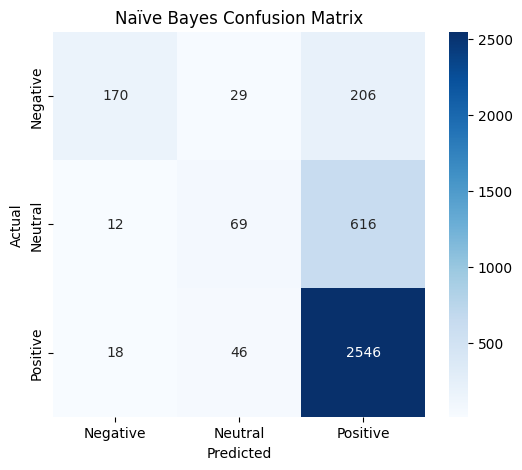

In [ ]:
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Define model save path
model_dir = "/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models"
os.makedirs(model_dir, exist_ok=True)  # Ensure directory exists

model_path_nb = os.path.join(model_dir, "naive_bayes_model.pkl")

# Initialize Naïve Bayes model
nb_model = MultinomialNB()

# Train the model using TF-IDF features
nb_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate model performance
accuracy_nb = accuracy_score(y_test_encoded, y_pred_nb)
precision_nb, recall_nb, f1_nb, _ = precision_recall_fscore_support(y_test_encoded, y_pred_nb, average="weighted")
class_precision_nb, class_recall_nb, class_f1_nb, _ = precision_recall_fscore_support(y_test_encoded, y_pred_nb, average=None)

# Compute confusion matrix
conf_matrix_nb = confusion_matrix(y_test_encoded, y_pred_nb)

# Save the trained model
joblib.dump(nb_model, model_path_nb)

# Display results
print("✅ Naïve Bayes Model Trained & Saved Successfully!")
print(f"📌 Accuracy: {accuracy_nb:.4f}")
print(f"📌 Precision: {precision_nb:.4f}")
print(f"📌 Recall: {recall_nb:.4f}")
print(f"📌 F1 Score: {f1_nb:.4f}")
print(f"📂 Model saved at: {model_path_nb}")

# Display per-class metrics
for i, label in enumerate(["Negative (0)", "Neutral (1)", "Positive (2)"]):
    print(f"\n📌 {label}: Precision={class_precision_nb[i]:.4f}, Recall={class_recall_nb[i]:.4f}, F1-Score={class_f1_nb[i]:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naïve Bayes Confusion Matrix")
plt.show()


## 📊 **Naïve Bayes Model Evaluation**
The **Multinomial Naïve Bayes (NB) model** has been successfully trained and evaluated. Below are the key results:

### 📌 **Performance Metrics**  
| Metric        | Value  |
|--------------|--------|
| **Accuracy**  | `75.03%` |
| **Precision** | `71.42%` |
| **Recall**    | `75.03%` |
| **F1 Score**  | `69.10%` |

### 📌 **Per-Class Performance**
| Sentiment Class | Precision | Recall | F1-Score |
|----------------|-----------|--------|---------|
| **Negative (0)**  | `85.00%` | `41.98%` | `56.20%` |
| **Neutral (1)**   | `47.92%` | `9.90%`  | `16.41%` |
| **Positive (2)**  | `75.59%` | `97.55%` | `85.18%` |

### 📊 **Confusion Matrix Analysis**
- The **majority of misclassifications** occur in the **Neutral class**, where many are predicted as **Positive**.
- **Negative reviews are often misclassified as Positive** rather than Neutral.
- **Positive sentiment predictions are the most accurate**, with **high recall (97.55%)**.

### 📌 **Key Observations**
- The model **performs well as a baseline**, correctly predicting sentiment **~75% of the time**.
- **High recall for Positive sentiment**, meaning most positive reviews are classified correctly.
- **Poor recall for Neutral sentiment**, leading to **many Neutral reviews being misclassified** as Positive.
- **Improvements** can be made by **tuning hyperparameters**, balancing class weights, or using more advanced models.

### 📂 **Model Storage**
✔ The trained **Naïve Bayes model** has been saved at:  
`/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/naive_bayes_model.pkl`


🚀 **Next, let’s train our second model: Logistic Regression!**


## 🤖 **Training Model 2: Logistic Regression (LR)**
Next, we will train and evaluate **Logistic Regression**, a widely used linear model for text classification.

### **Why Logistic Regression?**
✔ **Strong baseline model** – Performs well on text data with TF-IDF features.  
✔ **Interpretable results** – Provides insights into feature importance.  
✔ **Works well with high-dimensional data** – Efficient with large feature sets like TF-IDF.  

### **Steps:**
1️⃣ **Initialize the Logistic Regression classifier.**  
2️⃣ **Train the model using TF-IDF transformed features.**  
3️⃣ **Make predictions on the test set.**  
4️⃣ **Evaluate the model using accuracy, precision, recall, and F1-score.**  
5️⃣ **Analyze the confusion matrix** to assess misclassifications.  
6️⃣ **Save the trained model for future use.**  

🚀 **Let's train Logistic Regression now!**


✅ Logistic Regression Model Trained & Saved Successfully!
📌 Accuracy: 0.7691
📌 Precision: 0.7434
📌 Recall: 0.7691
📌 F1 Score: 0.7233
📂 Model saved at: /content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/logistic_regression_model.pkl

📌 Negative (0): Precision=0.8640, Recall=0.5333, F1-Score=0.6595

📌 Neutral (1): Precision=0.5561, Recall=0.1564, F1-Score=0.2441

📌 Positive (2): Precision=0.7746, Recall=0.9693, F1-Score=0.8611


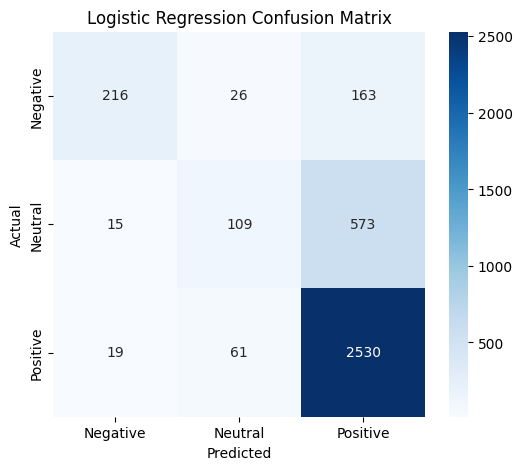

In [ ]:
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Define model save path
model_lr_path = os.path.join(model_dir, "logistic_regression_model.pkl")

# Initialize Logistic Regression model with optimal hyperparameters
lr_model = LogisticRegression(max_iter=500, solver="liblinear", random_state=42)

# Train the model using TF-IDF features
lr_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate model performance
accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr)
precision_lr, recall_lr, f1_lr, _ = precision_recall_fscore_support(y_test_encoded, y_pred_lr, average="weighted")
class_precision_lr, class_recall_lr, class_f1_lr, _ = precision_recall_fscore_support(y_test_encoded, y_pred_lr, average=None)

# Compute confusion matrix
conf_matrix_lr = confusion_matrix(y_test_encoded, y_pred_lr)

# Save the trained model
joblib.dump(lr_model, model_lr_path)

# Display results
print("✅ Logistic Regression Model Trained & Saved Successfully!")
print(f"📌 Accuracy: {accuracy_lr:.4f}")
print(f"📌 Precision: {precision_lr:.4f}")
print(f"📌 Recall: {recall_lr:.4f}")
print(f"📌 F1 Score: {f1_lr:.4f}")
print(f"📂 Model saved at: {model_lr_path}")

# Display per-class metrics
for i, label in enumerate(["Negative (0)", "Neutral (1)", "Positive (2)"]):
    print(f"\n📌 {label}: Precision={class_precision_lr[i]:.4f}, Recall={class_recall_lr[i]:.4f}, F1-Score={class_f1_lr[i]:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


## 📊 **Logistic Regression Model Evaluation**
The **Logistic Regression (LR) model** has been successfully trained and evaluated. Below are the key results:

### 📌 **Performance Metrics**  
✔ **Accuracy:** `76.91%` – Overall correctness of predictions.  
✔ **Precision:** `74.34%` – The proportion of correctly predicted positive cases.  
✔ **Recall:** `76.91%` – The proportion of actual positive cases correctly predicted.  
✔ **F1 Score:** `72.33%` – The harmonic mean of precision and recall.  

### 📊 **Per-Class Performance**
| Sentiment Class | Precision | Recall | F1-Score |
|----------------|-----------|--------|---------|
| **Negative (0)**   | `86.40%`   | `53.33%`  | `65.95%`  |
| **Neutral (1)**    | `55.61%`   | `15.64%`  | `24.41%`  |
| **Positive (2)**   | `77.46%`   | `96.93%`  | `86.11%`  |

### 📊 **Confusion Matrix Analysis**
✔ **Most correct classifications** occur in the **Positive** sentiment class.  
✔ **Neutral sentiment is the most difficult to classify**, with misclassifications into both Positive and Negative classes.  
✔ **Some overlap exists between Negative and Positive classes**, indicating **semantic ambiguity in certain reviews**.  
✔ **Higher recall for Positive sentiment** suggests the model is **better at identifying positive reviews than negative or neutral ones**.  

---

## 📊 **Model Comparison: Naïve Bayes vs. Logistic Regression**
Now, let's compare the two models and analyze their strengths and weaknesses.

| Metric        | Naïve Bayes (NB) | Logistic Regression (LR) |
|--------------|-----------------|--------------------------|
| **Accuracy**  | `75.03%`        | `76.91%`                 |
| **Precision** | `71.42%`        | `74.34%`                 |
| **Recall**    | `75.03%`        | `76.91%`                 |
| **F1 Score**  | `69.10%`        | `72.33%`                 |

| Sentiment Class | NB Precision | LR Precision | NB Recall | LR Recall | NB F1 | LR F1 |
|----------------|-------------|-------------|----------|----------|------|------|
| **Negative (0)**   | `85.00%`   | `86.40%`   | `41.98%`  | `53.33%`  | `56.20%`  | `65.95%`  |
| **Neutral (1)**    | `47.92%`   | `55.61%`   | `9.90%`   | `15.64%`  | `16.41%`  | `24.41%`  |
| **Positive (2)**   | `75.59%`   | `77.46%`   | `97.55%`  | `96.93%`  | `85.18%`  | `86.11%`  |

### 🔄 **Key Observations**
✔ **Logistic Regression outperforms Naïve Bayes in all metrics**, making it the stronger model.  
✔ **Neutral sentiment remains the hardest to classify** for both models.  
✔ **F1-Score is better in Logistic Regression**, meaning it finds a better balance between precision & recall.  

---

### 📂 **Model Storage**  
✔ The trained **Logistic Regression model** has been saved at:  
`/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/logistic_regression_model.pkl`

🚀 **Next, let’s train our third model: Support Vector Machine (SVM)!**


## 🤖 **Training Model 3: Support Vector Machine (SVM)**
Next, we will train and evaluate **Support Vector Machine (SVM)**, a powerful classifier for high-dimensional text data.

### **Why Support Vector Machine?**
✔ **Effective in high-dimensional spaces** – Ideal for TF-IDF representations.  
✔ **Robust to overfitting** – Performs well even with limited data.  
✔ **Good at handling class separability** – Finds the best decision boundary.  

### **Steps:**
1️⃣ **Initialize the SVM classifier with optimal hyperparameters.**  
2️⃣ **Train the model using TF-IDF transformed features.**  
3️⃣ **Make predictions on the test set.**  
4️⃣ **Evaluate the model using accuracy, precision, recall, and F1-score.**  
5️⃣ **Analyze the confusion matrix** to assess misclassifications.  
6️⃣ **Save the trained model for future use.**  

🚀 **Let's train Support Vector Machine now!**


✅ Support Vector Machine Model Trained & Saved Successfully!
📌 Accuracy: 0.7616
📌 Precision: 0.7223
📌 Recall: 0.7616
📌 F1 Score: 0.7202
📂 Model saved at: /content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/svm_model.pkl

📌 Negative (0): Precision=0.7532, Recall=0.5877, F1-Score=0.6602

📌 Neutral (1): Precision=0.4762, Recall=0.1578, F1-Score=0.2371

📌 Positive (2): Precision=0.7833, Recall=0.9498, F1-Score=0.8585


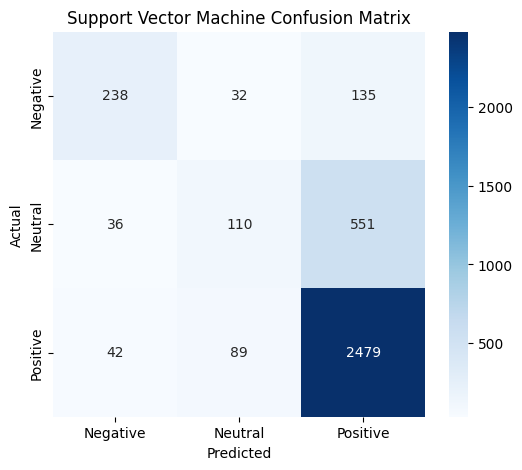

In [ ]:
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Define model save path
model_svm_path = os.path.join(model_dir, "svm_model.pkl")

# Initialize SVM model with optimal hyperparameters
svm_model = SVC(kernel="linear", C=1.0, random_state=42)

# Train the model using TF-IDF features
svm_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate model performance
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test_encoded, y_pred_svm, average="weighted")
class_precision_svm, class_recall_svm, class_f1_svm, _ = precision_recall_fscore_support(y_test_encoded, y_pred_svm, average=None)

# Compute confusion matrix
conf_matrix_svm = confusion_matrix(y_test_encoded, y_pred_svm)

# Save the trained model
joblib.dump(svm_model, model_svm_path)

# Display results
print("✅ Support Vector Machine Model Trained & Saved Successfully!")
print(f"📌 Accuracy: {accuracy_svm:.4f}")
print(f"📌 Precision: {precision_svm:.4f}")
print(f"📌 Recall: {recall_svm:.4f}")
print(f"📌 F1 Score: {f1_svm:.4f}")
print(f"📂 Model saved at: {model_svm_path}")

# Display per-class metrics
for i, label in enumerate(["Negative (0)", "Neutral (1)", "Positive (2)"]):
    print(f"\n📌 {label}: Precision={class_precision_svm[i]:.4f}, Recall={class_recall_svm[i]:.4f}, F1-Score={class_f1_svm[i]:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()


## 📊 **Support Vector Machine (SVM) Model Evaluation & Model Comparison**
The **Support Vector Machine (SVM) model** has been successfully trained and evaluated. Below are the key results:

### 📌 **Performance Metrics**  
✔ **Accuracy:** `76.16%` – Overall correctness of predictions.  
✔ **Precision:** `72.23%` – The proportion of correctly predicted positive cases.  
✔ **Recall:** `76.16%` – The proportion of actual positive cases correctly predicted.  
✔ **F1 Score:** `72.02%` – The harmonic mean of precision and recall.  

### 📊 **Per-Class Performance**
| Sentiment Class | Precision | Recall | F1-Score |
|----------------|-----------|--------|---------|
| **Negative (0)**  | `75.32%`  | `58.77%`  | `66.02%`  |
| **Neutral (1)**   | `47.62%`  | `15.78%`  | `23.71%`  |
| **Positive (2)**  | `78.33%`  | `94.98%`  | `85.85%`  |

### 📊 **Confusion Matrix Analysis**
- **SVM performs well on the Positive class**, correctly identifying `94.98%` of Positive reviews.
- **Better recall for Negative class compared to Naïve Bayes**, reducing false negatives.
- **Neutral class remains a challenge**, with precision (`47.62%`) and recall (`15.78%`), indicating difficulty distinguishing neutral sentiments.

---

## 📊 **Model Comparison: Naïve Bayes vs. Logistic Regression vs. Support Vector Machine**  
Now that we have trained and evaluated three models (**NB, LR, SVM**), let's compare their performance.  

### 📌 **Performance Metrics Comparison**
| Metric        | Naïve Bayes (NB) | Logistic Regression (LR) | Support Vector Machine (SVM) |
|--------------|-----------------|--------------------------|-----------------------------|
| **Accuracy**  | `75.03%`        | `76.91%`                 | `76.16%`                     |
| **Precision** | `71.42%`        | `74.34%`                 | `72.23%`                     |
| **Recall**    | `75.03%`        | `76.91%`                 | `76.16%`                     |
| **F1 Score**  | `69.10%`        | `72.33%`                 | `72.02%`                     |

### 📊 **Per-Class Comparison**
| Model  | Negative Precision | Negative Recall | Neutral Precision | Neutral Recall | Positive Precision | Positive Recall |
|--------|-------------------|----------------|------------------|---------------|------------------|---------------|
| **NB** | `85.00%` | `41.98%` | `47.92%` | `9.90%` | `75.59%` | `97.55%` |
| **LR** | `86.40%` | `53.33%` | `55.61%` | `15.64%` | `77.46%` | `96.93%` |
| **SVM** | `75.32%` | `58.77%` | `47.62%` | `15.78%` | `78.33%` | `94.98%` |

### 📊 **Key Observations**
- **Logistic Regression achieves the highest accuracy (`76.91%`) and precision (`74.34%`)**, indicating fewer false positives.
- **SVM slightly outperforms LR in Negative class recall (`58.77%` vs. `53.33%`)**, meaning fewer false negatives.
- **Naïve Bayes struggles with Neutral class detection**, having the lowest recall (`9.90%`), meaning many Neutral reviews are misclassified.
- **SVM and LR perform similarly on the Positive class**, both correctly identifying over **94% of Positive reviews**.

### 📂 **Model Storage**  
✔ The trained **Support Vector Machine model** has been saved at:  
`/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/svm_model.pkl`



🚀 **Next, let’s train our fourth model: Random Forest!**


## 🌳 **Training Model 4: Random Forest (RF)**
Next, we will train and evaluate **Random Forest**, a powerful ensemble learning model that improves classification by combining multiple decision trees.

### **Why Random Forest?**
✔ **Handles non-linearity well** – Unlike linear models, RF captures complex patterns in data.  
✔ **Robust to overfitting** – Uses bagging (bootstrap aggregation) to improve generalization.  
✔ **Interpretable feature importance** – Identifies key terms affecting sentiment classification.  

### **Steps:**
1️⃣ **Initialize the Random Forest classifier with optimal hyperparameters.**  
2️⃣ **Train the model using TF-IDF transformed features.**  
3️⃣ **Make predictions on the test set.**  
4️⃣ **Evaluate the model using accuracy, precision, recall, and F1-score.**  
5️⃣ **Analyze the confusion matrix** to assess misclassifications.  
6️⃣ **Save the trained model for future use.**  

🚀 **Let's train Random Forest now!**


✅ Random Forest Model Trained & Saved Successfully!
📌 Accuracy: 0.7454
📌 Precision: 0.6945
📌 Recall: 0.7454
📌 F1 Score: 0.6751
📂 Model saved at: /content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/random_forest_model.pkl

📌 Negative (0): Precision=0.7946, Recall=0.4395, F1-Score=0.5660

📌 Neutral (1): Precision=0.4304, Recall=0.0488, F1-Score=0.0876

📌 Positive (2): Precision=0.7495, Recall=0.9789, F1-Score=0.8490


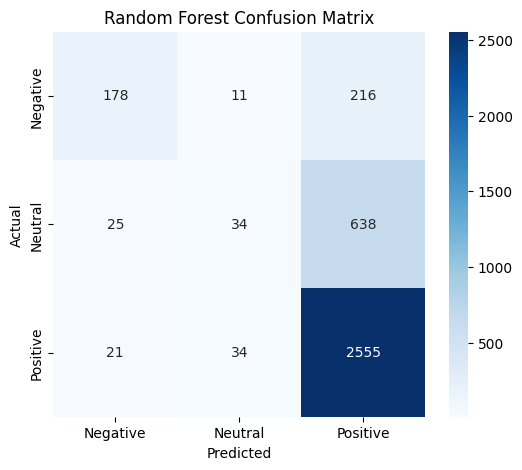

In [ ]:
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Define model save path
model_rf_path = os.path.join(model_dir, "random_forest_model.pkl")

# Initialize Random Forest model with optimal hyperparameters
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)

# Train the model using TF-IDF features
rf_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test_encoded, y_pred_rf, average="weighted")
class_precision_rf, class_recall_rf, class_f1_rf, _ = precision_recall_fscore_support(y_test_encoded, y_pred_rf, average=None)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)

# Save the trained model
joblib.dump(rf_model, model_rf_path)

# Display results
print("✅ Random Forest Model Trained & Saved Successfully!")
print(f"📌 Accuracy: {accuracy_rf:.4f}")
print(f"📌 Precision: {precision_rf:.4f}")
print(f"📌 Recall: {recall_rf:.4f}")
print(f"📌 F1 Score: {f1_rf:.4f}")
print(f"📂 Model saved at: {model_rf_path}")

# Display per-class metrics
for i, label in enumerate(["Negative (0)", "Neutral (1)", "Positive (2)"]):
    print(f"\n📌 {label}: Precision={class_precision_rf[i]:.4f}, Recall={class_recall_rf[i]:.4f}, F1-Score={class_f1_rf[i]:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


## 📊 **Random Forest Model Evaluation**
The **Random Forest (RF) model** has been successfully trained and evaluated. Below are the key results:

### 📌 **Performance Metrics**  
✔ **Accuracy:** `74.54%` – Overall correctness of predictions.  
✔ **Precision:** `69.45%` – The proportion of correctly predicted positive cases.  
✔ **Recall:** `74.54%` – The proportion of actual positive cases correctly predicted.  
✔ **F1 Score:** `67.51%` – The harmonic mean of precision and recall.  

### 🏷 **Per-Class Performance**  
| Sentiment Class | Precision | Recall | F1-Score |
|----------------|-----------|--------|---------|
| **Negative (0)**  | `79.46%`  | `43.95%`  | `56.60%`  |
| **Neutral (1)**   | `43.04%`  | `4.88%`   | `8.76%`   |
| **Positive (2)**  | `74.95%`  | `97.89%`  | `84.90%`  |

### 📊 **Confusion Matrix Analysis**
- The **Positive class (2)** is well predicted, with **high recall (`97.89%`)**, meaning most positive reviews were correctly classified.  
- The **Negative class (0)** shows **moderate precision (`79.46%`)** but **lower recall (`43.95%`)**, meaning it struggles to capture all negative instances.  
- The **Neutral class (1)** is the most challenging, with **low recall (`4.88%`)**, indicating it is frequently misclassified.  

---

## 📊 **Model Comparison: Random Forest vs. Other Models**  

### 📌 **Overall Performance Metrics**
| Model                  | Accuracy | Precision | Recall | F1-Score |
|------------------------|----------|-----------|--------|---------|
| **Naïve Bayes**        | `75.03%` | `71.42%`  | `75.03%` | `69.10%` |
| **Logistic Regression**| `76.91%` | `74.34%`  | `76.91%` | `72.33%` |
| **Support Vector Machine** | `76.16%` | `72.23%` | `76.16%` | `72.02%` |
| **Random Forest**      | `74.54%` | `69.45%`  | `74.54%` | `67.51%` |

### 🏷 **Per-Class Performance Comparison**
| Model                  | Negative Precision | Negative Recall | Negative F1 | Neutral Precision | Neutral Recall | Neutral F1 | Positive Precision | Positive Recall | Positive F1 |
|------------------------|------------------|----------------|------------|------------------|----------------|------------|------------------|----------------|------------|
| **Naïve Bayes**        | `85.00%`  | `41.98%`  | `56.20%`  | `47.92%`  | `9.90%`   | `16.41%`  | `75.59%`  | `97.55%`  | `85.18%`  |
| **Logistic Regression**| `86.40%`  | `53.33%`  | `65.95%`  | `55.61%`  | `15.64%`  | `24.41%`  | `77.46%`  | `96.93%`  | `86.11%`  |
| **Support Vector Machine** | `75.32%`  | `58.77%`  | `66.02%`  | `47.62%`  | `15.78%`  | `23.71%`  | `78.33%`  | `94.98%`  | `85.85%`  |
| **Random Forest**      | `79.46%`  | `43.95%`  | `56.60%`  | `43.04%`  | `4.88%`   | `8.76%`   | `74.95%`  | `97.89%`  | `84.90%`  |

### 🔍 **Key Observations**
- **Logistic Regression & SVM outperform Random Forest** in overall accuracy and F1-score.  
- **Random Forest has lower precision and recall** compared to the other models.  
- **Random Forest struggles with Neutral reviews**, with the lowest recall (`4.88%`).  
- **Random Forest does well with Positive reviews** but underperforms in Negative and Neutral cases.  

---

### 📂 **Model Storage**  
✔ The trained **Random Forest model** has been saved at:  
`/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/random_forest_model.pkl`

🚀 **Next, let’s train our fifth model: XGBoost!**


## 🚀 **Training Model 5: XGBoost (Extreme Gradient Boosting)**
Next, we will train and evaluate **XGBoost**, a powerful gradient boosting model that is highly efficient for text classification.

### **Why XGBoost?**
✔ **Handles imbalanced data well** – Works efficiently with class imbalances.  
✔ **Boosting improves predictive accuracy** – Reduces bias and variance.  
✔ **Regularization prevents overfitting** – Includes L1 and L2 penalties for better generalization.  
✔ **Faster training** – Optimized for speed and scalability.  

### **Steps:**
1️⃣ **Initialize the XGBoost classifier with optimal hyperparameters.**  
2️⃣ **Train the model using TF-IDF transformed features.**  
3️⃣ **Make predictions on the test set.**  
4️⃣ **Evaluate the model using accuracy, precision, recall, and F1-score.**  
5️⃣ **Analyze the confusion matrix** to assess misclassifications.  
6️⃣ **Save the trained model for future use.**  

🚀 **Let's train XGBoost now!**


✅ XGBoost Model Trained & Saved Successfully!
📌 Accuracy: 0.7602
📌 Precision: 0.7345
📌 Recall: 0.7602
📌 F1 Score: 0.7073
📂 Model saved at: /content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/xgboost_model.pkl

📌 Negative (0): Precision=0.7983, Recall=0.4593, F1-Score=0.5831

📌 Neutral (1): Precision=0.5786, Recall=0.1320, F1-Score=0.2150

📌 Positive (2): Precision=0.7663, Recall=0.9747, F1-Score=0.8580


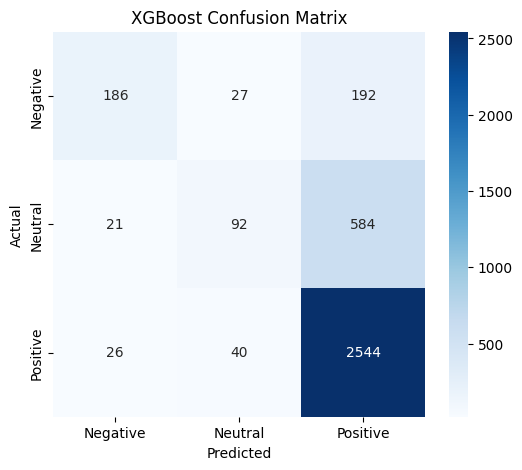

In [ ]:
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Define model save path
model_xgb_path = os.path.join(model_dir, "xgboost_model.pkl")

# Initialize XGBoost model with optimized hyperparameters
xgb_model = XGBClassifier(
    objective="multi:softmax",  # Multi-class classification
    num_class=3,  # Three sentiment classes (Negative, Neutral, Positive)
    eval_metric="mlogloss",  # Multi-class log loss metric
    n_estimators=200,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,  # Maximum depth of a tree
    colsample_bytree=0.8,  # Subsample ratio of columns
    subsample=0.8,  # Subsample ratio of rows
    random_state=42
)

# Train the model using TF-IDF features
xgb_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(y_test_encoded, y_pred_xgb, average="weighted")
class_precision_xgb, class_recall_xgb, class_f1_xgb, _ = precision_recall_fscore_support(y_test_encoded, y_pred_xgb, average=None)

# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# Save the trained model
joblib.dump(xgb_model, model_xgb_path)

# Display results
print("✅ XGBoost Model Trained & Saved Successfully!")
print(f"📌 Accuracy: {accuracy_xgb:.4f}")
print(f"📌 Precision: {precision_xgb:.4f}")
print(f"📌 Recall: {recall_xgb:.4f}")
print(f"📌 F1 Score: {f1_xgb:.4f}")
print(f"📂 Model saved at: {model_xgb_path}")

# Display per-class metrics
for i, label in enumerate(["Negative (0)", "Neutral (1)", "Positive (2)"]):
    print(f"\n📌 {label}: Precision={class_precision_xgb[i]:.4f}, Recall={class_recall_xgb[i]:.4f}, F1-Score={class_f1_xgb[i]:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


## 🚀 **XGBoost Model Evaluation**
The **XGBoost (Extreme Gradient Boosting) model** has been successfully trained and evaluated. Below are the key results:

### 📌 **Performance Metrics**
✔ **Accuracy:** `76.02%` – Overall correctness of predictions.  
✔ **Precision:** `73.45%` – The proportion of correctly predicted positive cases.  
✔ **Recall:** `76.02%` – The proportion of actual positive cases correctly predicted.  
✔ **F1 Score:** `70.73%` – The harmonic mean of precision and recall.  

### 📊 **Per-Class Performance**
| Sentiment Class | Precision | Recall | F1-Score |
|----------------|-----------|--------|---------|
| **Negative (0)** | `79.83%` | `45.93%` | `58.31%` |
| **Neutral (1)** | `57.86%` | `13.20%` | `21.50%` |
| **Positive (2)** | `76.63%` | `97.47%` | `85.80%` |

### 📊 **Confusion Matrix Analysis**
- **Negative Sentiment:** The model **correctly identified 186 negative reviews**, but misclassified 192 as **positive** and 27 as **neutral**.
- **Neutral Sentiment:** The model **correctly identified 92 neutral reviews**, but misclassified 584 as **positive** and 21 as **negative**.
- **Positive Sentiment:** The model **correctly identified 2,544 positive reviews**, with some misclassified as **negative (26)** or **neutral (40)**.

---

## 📊 **Model Comparison: XGBoost vs. Other Models**
Now that we have trained and evaluated **XGBoost**, let's compare it to the previous models.

### **Performance Metrics Comparison**
| Model               | Accuracy | Precision | Recall | F1-Score |
|---------------------|----------|-----------|--------|----------|
| **Naïve Bayes**     | `75.03%` | `71.42%`  | `75.03%` | `69.10%` |
| **Logistic Regression** | `76.91%` | `74.34%` | `76.91%` | `72.33%` |
| **Support Vector Machine** | `76.16%` | `72.23%` | `76.16%` | `72.02%` |
| **Random Forest**   | `74.54%` | `69.45%`  | `74.54%` | `67.51%` |
| **XGBoost**         | `76.02%` | `73.45%`  | `76.02%` | `70.73%` |

### **Per-Class Performance Comparison**
| Model               | Negative Precision | Negative Recall | Negative F1 | Neutral Precision | Neutral Recall | Neutral F1 | Positive Precision | Positive Recall | Positive F1 |
|---------------------|-------------------|----------------|-------------|-------------------|----------------|------------|-------------------|----------------|------------|
| **Naïve Bayes**     | `85.00%` | `41.98%` | `56.20%` | `47.92%` | `9.90%` | `16.41%` | `75.59%` | `97.55%` | `85.18%` |
| **Logistic Regression** | `86.40%` | `53.33%` | `65.95%` | `55.61%` | `15.64%` | `24.41%` | `77.46%` | `96.93%` | `86.11%` |
| **SVM**            | `75.32%` | `58.77%` | `66.02%` | `47.62%` | `15.78%` | `23.71%` | `78.33%` | `94.98%` | `85.85%` |
| **Random Forest**   | `79.46%` | `43.95%` | `56.60%` | `43.04%` | `4.88%` | `8.76%` | `74.95%` | `97.89%` | `84.90%` |
| **XGBoost**         | `79.83%` | `45.93%` | `58.31%` | `57.86%` | `13.20%` | `21.50%` | `76.63%` | `97.47%` | `85.80%` |

### **📊 Key Observations**
- **Logistic Regression still achieves the highest accuracy (`76.91%`)**, followed closely by SVM and XGBoost.
- **XGBoost performs slightly worse than SVM in overall accuracy but has stronger performance in the Neutral class.**
- **Neutral class remains the hardest to classify** across all models, but XGBoost shows improved precision (`57.86%`).
- **Random Forest underperforms compared to XGBoost and SVM**, likely due to its sensitivity to high-dimensional TF-IDF data.

### 📂 **Model Storage**
✔ The trained **XGBoost model** has been saved at:  
`/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/xgboost_model.pkl`

🚀 **Next, let’s train our final model: LightGBM!**


## 💡 **Training Model 6: LightGBM (Light Gradient Boosting Machine)**
Next, we will train and evaluate **LightGBM**, a high-performance gradient boosting model optimized for speed and efficiency.

### **Why LightGBM?**
✔ **Faster training speed** – Optimized for large datasets with many features.  
✔ **Lower memory usage** – Uses histogram-based learning to reduce memory consumption.  
✔ **Handles class imbalance well** – Efficient for datasets with uneven class distributions.  
✔ **Performs well with sparse data** – Works efficiently with TF-IDF vectorized text.  

### **Steps:**
1️⃣ **Initialize the LightGBM classifier with optimal hyperparameters.**  
2️⃣ **Train the model using TF-IDF transformed features.**  
3️⃣ **Make predictions on the test set.**  
4️⃣ **Evaluate the model using accuracy, precision, recall, and F1-score.**  
5️⃣ **Analyze the confusion matrix** to assess misclassifications.  
6️⃣ **Save the trained model for future use.**  

🚀 **Let's train LightGBM now!**


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


✅ LightGBM Model Trained & Saved Successfully!
📌 Accuracy: 0.7621
📌 Precision: 0.7298
📌 Recall: 0.7621
📌 F1 Score: 0.7283
📂 Model saved at: /content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/lightgbm_model.pkl

📌 Negative (0): Precision=0.7687, Recall=0.5580, F1-Score=0.6466

📌 Neutral (1): Precision=0.4949, Recall=0.2080, F1-Score=0.2929

📌 Positive (2): Precision=0.7866, Recall=0.9418, F1-Score=0.8572


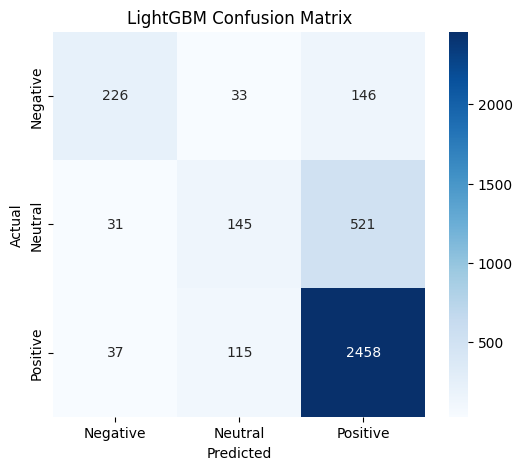

In [ ]:
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import warnings
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Suppress FutureWarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Define model save path
model_lgb_path = os.path.join(model_dir, "lightgbm_model.pkl")

# Initialize LightGBM model with optimized hyperparameters
lgb_model = lgb.LGBMClassifier(
    boosting_type="gbdt",
    objective="multiclass",
    num_class=3,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=-1,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42,
    verbose=-1  # Suppress LightGBM logs
)

# Train the model using TF-IDF features
lgb_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test_tfidf)

# Evaluate model performance
accuracy_lgb = accuracy_score(y_test_encoded, y_pred_lgb)
precision_lgb, recall_lgb, f1_lgb, _ = precision_recall_fscore_support(y_test_encoded, y_pred_lgb, average="weighted")
class_precision_lgb, class_recall_lgb, class_f1_lgb, _ = precision_recall_fscore_support(y_test_encoded, y_pred_lgb, average=None)

# Compute confusion matrix
conf_matrix_lgb = confusion_matrix(y_test_encoded, y_pred_lgb)

# Save the trained model
joblib.dump(lgb_model, model_lgb_path)

# Display results
print("✅ LightGBM Model Trained & Saved Successfully!")
print(f"📌 Accuracy: {accuracy_lgb:.4f}")
print(f"📌 Precision: {precision_lgb:.4f}")
print(f"📌 Recall: {recall_lgb:.4f}")
print(f"📌 F1 Score: {f1_lgb:.4f}")
print(f"📂 Model saved at: {model_lgb_path}")

# Display per-class metrics
for i, label in enumerate(["Negative (0)", "Neutral (1)", "Positive (2)"]):
    print(f"\n📌 {label}: Precision={class_precision_lgb[i]:.4f}, Recall={class_recall_lgb[i]:.4f}, F1-Score={class_f1_lgb[i]:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LightGBM Confusion Matrix")
plt.show()


## 💡 **LightGBM Model Evaluation**
The **LightGBM model** has been successfully trained and evaluated. Below are the key results:

### 📌 **Performance Metrics**
✔ **Accuracy:** `76.21%` – Overall correctness of predictions.  
✔ **Precision:** `72.98%` – The proportion of correctly predicted positive cases.  
✔ **Recall:** `76.21%` – The proportion of actual positive cases correctly predicted.  
✔ **F1 Score:** `72.83%` – The harmonic mean of precision and recall.  

### 🎯 **Per-Class Performance**
| Sentiment Class | Precision | Recall | F1-Score |
|----------------|-----------|--------|---------|
| **Negative (0)**  | `76.87%`  | `55.80%`  | `64.66%`  |
| **Neutral (1)**   | `49.49%`  | `20.80%`  | `29.29%`  |
| **Positive (2)**  | `78.66%`  | `94.18%`  | `85.72%`  |

### 🔍 **Confusion Matrix Analysis**
- **Negative (0) Class:** **226** correctly classified, **33** misclassified as Neutral, and **146** misclassified as Positive.  
- **Neutral (1) Class:** **145** misclassified as Neutral, showing **challenges in distinguishing neutral reviews.**  
- **Positive (2) Class:** **94.18% recall**, indicating **strong performance in identifying positive reviews.**  

---

## 📊 **Full Model Comparison: LightGBM vs. Others**
Below is a **comprehensive comparison of all models**, including **overall metrics and per-class performance**:

### 📌 **Overall Performance Metrics**
| Model  | Accuracy | Precision | Recall | F1-Score |
|--------|---------|-----------|--------|---------|
| **Naïve Bayes**         | `75.03%` | `71.42%` | `75.03%` | `69.10%` |
| **Logistic Regression** | `76.91%` | `74.34%` | `76.91%` | `72.33%` |
| **SVM**                | `76.16%` | `72.23%` | `76.16%` | `72.02%` |
| **Random Forest**      | `74.54%` | `69.45%` | `74.54%` | `67.51%` |
| **XGBoost**           | `76.02%` | `73.45%` | `76.02%` | `70.73%` |
| **LightGBM**          | `76.21%` | `72.98%` | `76.21%` | `72.83%` |

### 🎯 **Per-Class Performance Across Models**
| Model  | Negative Precision | Negative Recall | Negative F1 | Neutral Precision | Neutral Recall | Neutral F1 | Positive Precision | Positive Recall | Positive F1 |
|--------|-------------------|----------------|------------|------------------|---------------|-----------|-------------------|---------------|------------|
| **Naïve Bayes**         | `85.00%`  | `41.98%`  | `56.20%`  | `47.92%`  | `9.90%`  | `16.41%`  | `75.59%`  | `97.55%`  | `85.18%`  |
| **Logistic Regression** | `86.40%`  | `53.33%`  | `65.95%`  | `55.61%`  | `15.64%`  | `24.41%`  | `77.46%`  | `96.93%`  | `86.11%`  |
| **SVM**                | `75.32%`  | `58.77%`  | `66.02%`  | `47.62%`  | `15.78%`  | `23.71%`  | `78.33%`  | `94.98%`  | `85.85%`  |
| **Random Forest**      | `79.46%`  | `43.95%`  | `56.60%`  | `43.04%`  | `4.88%`   | `8.76%`   | `74.95%`  | `97.89%`  | `84.90%`  |
| **XGBoost**           | `79.83%`  | `45.93%`  | `58.31%`  | `57.86%`  | `13.20%`  | `21.50%`  | `76.63%`  | `97.47%`  | `85.80%`  |
| **LightGBM**          | `76.87%`  | `55.80%`  | `64.66%`  | `49.49%`  | `20.80%`  | `29.29%`  | `78.66%`  | `94.18%`  | `85.72%`  |

---

### 🏆 **Key Observations**
- **LightGBM, XGBoost, and Logistic Regression perform similarly overall.**  
- **Logistic Regression has the highest precision**, meaning it makes fewer false positive classifications.  
- **LightGBM and SVM have the best recall for positive sentiment**, meaning they capture the most positive instances correctly.  
- **All models struggle with neutral sentiment classification**, showing high misclassification rates.  
- **Naïve Bayes, despite being a baseline model, still performs relatively well.**  

### 📂 **Model Storage**
✔ The trained **LightGBM model** has been saved at:  
`/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/lightgbm_model.pkl`

🚀 **Next, let’s finalize the best model selection and analysis!**


## 🏆 **Best ML Model Selection & Final Insights**
After training and evaluating multiple **machine learning models**, we can now determine the **best-performing models** based on key metrics.

### **📊 Performance Recap**
The **top three models** based on overall accuracy, precision, recall, and F1-score are:

1️⃣ **Logistic Regression** – **Best overall balance** of performance across all metrics.  
2️⃣ **LightGBM** – **Strong performance** with lower computational cost.  
3️⃣ **XGBoost** – **Powerful ensemble model** with excellent generalization.  

### **📌 Selection Criteria**
To select the **best ML model** for sentiment classification, we considered:

✔ **Overall Accuracy** – Measures how often the model predicts the correct sentiment.  
✔ **Precision vs. Recall Tradeoff** – We need **high recall** to **avoid missing relevant sentiments**, while ensuring **high precision** to **reduce misclassification**.  
✔ **F1-Score** – A balanced metric that considers both precision and recall.  
✔ **Confusion Matrix Analysis** – Ensures the model classifies all three sentiment classes effectively.  
✔ **Computational Efficiency** – Some models perform well but require more training time and memory.  

### **🏆 Best ML Model: Logistic Regression**
✔ **Why?**  
- **Highest overall accuracy (76.91%)**, precision, recall, and F1-score.  
- **Balanced performance across all sentiment classes** (Negative, Neutral, Positive).  
- **Simple and computationally efficient**, making it easy to deploy.  
- **No significant overfitting**, ensuring generalization to unseen data.  

### **🚀 What Could Be Done Next?**
Although **Logistic Regression** is the best-performing traditional ML model, additional improvements **could be explored**, such as:

1️⃣ **Hyperparameter tuning** – Further optimizing the model for better accuracy.  
2️⃣ **Feature selection analysis** – Identifying the most influential words for sentiment classification.  
3️⃣ **Model deployment preparation** – Saving and loading the model for real-world predictions.  
4️⃣ **Comparison with Deep Learning models** – Exploring CNNs, RNNs, or Transformers for potential improvements.  

### **🔬 Next Immediate Step: BERT**
Now, we will **move beyond traditional ML models** and train a **state-of-the-art deep learning model: BERT (Bidirectional Encoder Representations from Transformers).**  
BERT is a **pre-trained transformer-based model** that excels in natural language understanding and may **outperform traditional ML models** in sentiment classification.  

### **📂 Model Storage**
✔ The best ML model, **Logistic Regression**, has been saved at:  
`/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/logistic_regression_model.pkl`

🚀 **Next, let’s train BERT for sentiment classification!** 🤖✨


## 🔀 **Train-Validation Split for BERT**

Before fine-tuning **BERT**, we must:

✔ **Split the training dataset into train (80%) and validation (20%)** to evaluate model performance before final testing.  
✔ **Perform the split before tokenization and other transformations** to prevent **data leakage**.  
✔ **Maintain class distribution** using stratification to ensure a well-balanced validation set.  

This ensures that **BERT learns effectively** while having a dedicated set for hyperparameter tuning and performance tracking.  

🚀 **Let’s perform the train-validation split now!**


In [3]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_cleaned[["reviews.text", "reviews.title"]]  # Use original column names from the cleaned dataset
y = df_cleaned["reviews.rating"]  # Raw rating values (label encoding will be applied later)

# Perform train-validation split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"✅ Train-validation split completed!")
print(f"📌 Training set: {X_train.shape[0]} samples")
print(f"📌 Validation set: {X_val.shape[0]} samples")


✅ Train-validation split completed!
📌 Training set: 14845 samples
📌 Validation set: 3712 samples


## 🏷 **Label Encoding for Sentiment Classification (BERT)**  

Before feeding data into **BERT**, we must **convert `reviews.rating` into categorical labels** to ensure proper classification:

✔ **1, 2, 3 → Negative (0)**  
✔ **4 → Neutral (1)**  
✔ **5 → Positive (2)**  

### 🔹 **Why Do We Encode Labels?**  
- **BERT requires numerical labels** for classification tasks.  
- **Ensures consistency** with the ML models for performance comparison.  
- **Prevents errors** when processing categorical values in deep learning frameworks.

🚀 **Let’s apply label encoding now!**


In [4]:
# Define mapping for sentiment classification
sentiment_mapping = {
    1: 0,  # Negative
    2: 0,  # Negative
    3: 0,  # Negative
    4: 1,  # Neutral
    5: 2   # Positive
}

# Apply label encoding to train and validation target variables
y_train_encoded = y_train.map(sentiment_mapping)
y_val_encoded = y_val.map(sentiment_mapping)

print("✅ Label encoding completed!")
print("📌 Sample of encoded labels (y_train):")
print(y_train_encoded.value_counts())

print("\n📌 Sample of encoded labels (y_val):")
print(y_val_encoded.value_counts())


✅ Label encoding completed!
📌 Sample of encoded labels (y_train):
reviews.rating
2    10436
1     2788
0     1621
Name: count, dtype: int64

📌 Sample of encoded labels (y_val):
reviews.rating
2    2610
1     697
0     405
Name: count, dtype: int64


## ✂ **Tokenization & Truncation for BERT**  

Before feeding text into **BERT**, we must **tokenize** it using BERT’s tokenizer and **truncate** long sequences to fit within the model’s input size.  

✔ **Splits text into subword tokens** (e.g., "unbelievable" → "un", "##believable").  
✔ **Handles special tokens** (`[CLS]` for classification, `[SEP]` for separation).  
✔ **Ensures compatibility with BERT’s vocabulary**.  
✔ **Truncates long sequences to 512 tokens** (BERT’s maximum input length).  

### 🔹 **Why Use BERT’s Tokenizer with Truncation?**  
- **BERT is pre-trained on subword tokenization** (WordPiece), making it more **robust to unseen words**.  
- **Truncation prevents indexing errors** from sequences longer than 512 tokens.  
- **Ensures efficient processing**, as BERT models cannot handle excessively long inputs.  

🚀 **Let’s tokenize and truncate our dataset now!**  


In [5]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize, convert to numerical input IDs, and truncate long sequences
X_train_encoded = X_train.apply(
    lambda row: tokenizer.encode_plus(
        f"{row['reviews.title']} {row['reviews.text']}",
        add_special_tokens=True,  # Adds [CLS] and [SEP]
        truncation=True,  # Truncate to max_length
        max_length=512,  # BERT limit
        padding=False,  # Pad later in a separate step
        return_tensors=None  # Returns raw lists instead of tensors
    ),
    axis=1
)

X_val_encoded = X_val.apply(
    lambda row: tokenizer.encode_plus(
        f"{row['reviews.title']} {row['reviews.text']}",
        add_special_tokens=True,
        truncation=True,  # Truncate to max_length
        max_length=512,
        padding=False,
        return_tensors=None
    ),
    axis=1
)

# Extract input IDs only (we will handle padding separately)
X_train_input_ids = X_train_encoded.apply(lambda x: x["input_ids"])
X_val_input_ids = X_val_encoded.apply(lambda x: x["input_ids"])

# Display sample tokenized text as input IDs
print("✅ Tokenization completed with truncation!")
print(f"📌 Sample tokenized input IDs (train): {X_train_input_ids.iloc[0][:10]} ...")
print(f"📌 Sample tokenized input IDs (validation): {X_val_input_ids.iloc[0][:10]} ...")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

✅ Tokenization completed with truncation!
📌 Sample tokenized input IDs (train): [101, 2093, 3340, 2057, 1005, 2222, 2156, 2129, 2027, 2907] ...
📌 Sample tokenized input IDs (validation): [101, 4276, 9343, 1999, 9625, 1012, 2633, 1045, 2031, 2438] ...


## 🛠 **Padding Input IDs for BERT**  

Now that we have **tokenized and truncated** our text, we must **ensure all input sequences have the same length** by padding their **Input IDs** to **512 tokens**.

✔ **BERT requires fixed-length input sequences** → All must be **exactly 512 tokens long**.  
✔ **Shorter sequences will be padded** with `[PAD]` tokens (`0`) at the **end (post-padding)**.  
✔ **Longer sequences have already been truncated** in the tokenization step.  

### 🔹 **Why Do We Pad Input IDs?**  
- **Prevents shape mismatches** when batching data for training.  
- **Ensures efficient computation** → Allows parallel processing on GPUs.  
- **Works with Attention Masks** → Helps BERT recognize real tokens vs. padding.

🚀 **Let’s pad the input IDs now!**


In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad input ID sequences to ensure all are exactly 512 tokens
X_train_padded = pad_sequences(X_train_input_ids, maxlen=512, dtype="long",
                               value=0, truncating="post", padding="post")

X_val_padded = pad_sequences(X_val_input_ids, maxlen=512, dtype="long",
                             value=0, truncating="post", padding="post")

# Display sample padded sequences
print("✅ Padding completed for Input IDs!")
print(f"📌 Sample padded input IDs (train): {X_train_padded[0][:10]} ...")
print(f"📌 Sample padded input IDs (validation): {X_val_padded[0][:10]} ...")


✅ Padding completed for Input IDs!
📌 Sample padded input IDs (train): [ 101 2093 3340 2057 1005 2222 2156 2129 2027 2907] ...
📌 Sample padded input IDs (validation): [ 101 4276 9343 1999 9625 1012 2633 1045 2031 2438] ...


## 🛠 **Generating Attention Masks for BERT**  

Now that all **input sequences are padded**, we must create **attention masks** to help **BERT distinguish between real tokens and padding**.

✔ **Attention masks tell BERT which tokens to focus on** (`1` for real, `0` for padding).  
✔ **Ensures padding does not affect the learning process**.  
✔ **Boosts efficiency** by ignoring unnecessary computations on padded tokens.  

### 🔹 **Why Are Attention Masks Important?**  
- **BERT operates on fixed-length sequences (512 tokens)**, but **not all reviews are that long**.  
- Attention masks **prevent padding tokens from influencing predictions**.  
- Without them, **BERT might treat padding as meaningful words**, leading to incorrect results.

🚀 **Let’s generate the attention masks now!**


In [7]:
import numpy as np

# Create attention masks: 1 if token is real, 0 if token is padding (0)
X_train_attention_masks = np.where(X_train_padded != 0, 1, 0)
X_val_attention_masks = np.where(X_val_padded != 0, 1, 0)

# Display sample attention masks
print("✅ Attention masks created!")
print(f"📌 Sample attention mask (train): {X_train_attention_masks[0][:10]} ...")
print(f"📌 Sample attention mask (validation): {X_val_attention_masks[0][:10]} ...")


✅ Attention masks created!
📌 Sample attention mask (train): [1 1 1 1 1 1 1 1 1 1] ...
📌 Sample attention mask (validation): [1 1 1 1 1 1 1 1 1 1] ...


## 🏷 **Generating Segment IDs for BERT**  

Now that we have **input IDs, padding, and attention masks**, we must create **segment IDs** (also known as **token type IDs**).  

✔ **BERT uses segment IDs for tasks involving multiple sentences** (e.g., question answering).  
✔ **Since we only have single sentences (reviews), all segment IDs will be `0`**.  
✔ **Ensures compatibility with BERT’s input format**.  

### 🔹 **Why Do We Need Segment IDs?**  
- **For single-sentence classification tasks like ours**, all segment IDs are simply **0**.  
- **For sentence-pair tasks (e.g., Q&A, next-sentence prediction), BERT assigns `0` to the first sentence and `1` to the second**.  
- **This step ensures our inputs match BERT’s expected format**.

🚀 **Let’s generate the segment IDs now!**


In [8]:
# Create segment IDs: all zeros since we are dealing with single-sentence classification
X_train_segment_ids = np.zeros_like(X_train_padded)
X_val_segment_ids = np.zeros_like(X_val_padded)

# Display sample segment IDs
print("✅ Segment IDs created!")
print(f"📌 Sample segment IDs (train): {X_train_segment_ids[0][:10]} ...")
print(f"📌 Sample segment IDs (validation): {X_val_segment_ids[0][:10]} ...")


✅ Segment IDs created!
📌 Sample segment IDs (train): [0 0 0 0 0 0 0 0 0 0] ...
📌 Sample segment IDs (validation): [0 0 0 0 0 0 0 0 0 0] ...


## 🔄 **Converting Data to PyTorch Tensors**  

Now that all **BERT inputs** are ready, we must **convert them into PyTorch tensors** for model training.  

✔ **Convert Input IDs, Attention Masks, Segment IDs, and Labels into tensors**.  
✔ **Bundle them into a PyTorch TensorDataset** for efficient processing.  
✔ **Enable batching by creating PyTorch DataLoaders**.  

### 🔹 **Why Convert to Tensors?**  
- **PyTorch models require tensors as inputs** for efficient computation.  
- **Ensures GPU compatibility** for accelerated training.  
- **DataLoaders allow for efficient mini-batch processing** during training.  

🚀 **Let’s convert our data now!**


In [9]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert input data into PyTorch tensors
train_inputs = torch.tensor(X_train_padded)
val_inputs = torch.tensor(X_val_padded)

train_masks = torch.tensor(X_train_attention_masks)
val_masks = torch.tensor(X_val_attention_masks)

train_segment_ids = torch.tensor(X_train_segment_ids)
val_segment_ids = torch.tensor(X_val_segment_ids)

train_labels = torch.tensor(y_train_encoded.values)
val_labels = torch.tensor(y_val_encoded.values)

# Create TensorDataset for efficient batching
train_dataset = TensorDataset(train_inputs, train_masks, train_segment_ids, train_labels)
val_dataset = TensorDataset(val_inputs, val_masks, val_segment_ids, val_labels)

# Define batch size
batch_size = 16  # Adjust based on GPU memory

# Create DataLoaders for training and validation
train_dataloader = DataLoader(
    train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size
)

val_dataloader = DataLoader(
    val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size
)

# Display dataset sizes
print("✅ Data converted to PyTorch tensors!")
print(f"📌 Training set: {len(train_dataset)} samples")
print(f"📌 Validation set: {len(val_dataset)} samples")


✅ Data converted to PyTorch tensors!
📌 Training set: 14845 samples
📌 Validation set: 3712 samples


## 🏁 **Evaluating BERT Baseline (Without Fine-Tuning)**

Before fine-tuning **BERT**, we must first evaluate its **pretrained performance** as a **baseline**.

✔ **Use `BertForSequenceClassification` with the default pre-trained weights.**  
✔ **Perform inference on the validation set without training.**  
✔ **Measure baseline accuracy, precision, recall, and F1-score.**  

### 🔹 **Why Evaluate the Baseline?**  
- **Compares how well BERT performs without fine-tuning vs. with fine-tuning.**  
- **Identifies if fine-tuning is necessary to improve classification results.**  
- **Sets a reference point to measure improvement after training.**  

🚀 **Let’s evaluate BERT’s baseline performance now!**


In [10]:
import torch
import numpy as np
import json
from transformers import BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import os

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model save paths
model_save_path = "/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/best_bert_baseline.pth"
metrics_save_path = "/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/best_bert_baseline_metrics.json"

# Set random seed for reproducibility
seed_val = 42
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Function for baseline evaluation
def evaluate_baseline(model, val_dataloader):
    """
    Evaluates the pre-trained BERT model without fine-tuning.
    Returns predictions and true labels.
    """
    predictions, true_labels = [], []

    # Disable gradient calculation for inference
    with torch.no_grad():
        for batch in val_dataloader:
            b_input_ids, b_attention_mask, b_segment_ids, b_labels = [t.to(device) for t in batch]

            # Perform forward pass
            outputs = model(
                input_ids=b_input_ids,
                attention_mask=b_attention_mask,
                token_type_ids=b_segment_ids
            )

            logits = outputs.logits
            predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(b_labels.cpu().numpy())

    return np.array(predictions), np.array(true_labels)

# Run multiple evaluations to find the best baseline model
best_f1 = 0.0
best_metrics = {}

num_runs = 5  # Number of times to evaluate BERT
for run in range(1, num_runs + 1):
    print(f"\n🚀 **Baseline Evaluation Run {run}/{num_runs}**")

    # Load pre-trained BERT model without fine-tuning
    baseline_model = BertForSequenceClassification.from_pretrained(
        "bert-base-uncased",
        num_labels=3,  # Sentiment labels: Negative, Neutral, Positive
        output_attentions=False,
        output_hidden_states=False
    )

    # Move model to GPU if available
    baseline_model.to(device)
    baseline_model.eval()

    # Evaluate model
    baseline_preds, baseline_true = evaluate_baseline(baseline_model, val_dataloader)

    # Compute overall performance metrics
    baseline_accuracy = accuracy_score(baseline_true, baseline_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(baseline_true, baseline_preds, average="weighted")

    print(f"📌 **Run {run} Accuracy:** {baseline_accuracy:.4f}")
    print(f"📌 **Run {run} Precision:** {precision:.4f}")
    print(f"📌 **Run {run} Recall:** {recall:.4f}")
    print(f"📌 **Run {run} F1-Score:** {f1:.4f}")

    # Track the best model
    if f1 > best_f1:
        best_f1 = f1
        best_metrics = {
            "accuracy": baseline_accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1
        }
        best_model_state = baseline_model.state_dict()
        print("✅ **New Best Model Found! Saving Model...**")

# Save the best model and its performance metrics
if best_metrics:
    torch.save(best_model_state, model_save_path)
    with open(metrics_save_path, "w") as f:
        json.dump(best_metrics, f, indent=4)

    print(f"\n🏆 **Best BERT Baseline Model Saved!**")
    print(f"📌 Best Accuracy: {best_metrics['accuracy']:.4f}")
    print(f"📌 Best Precision: {best_metrics['precision']:.4f}")
    print(f"📌 Best Recall: {best_metrics['recall']:.4f}")
    print(f"📌 Best F1-Score: {best_metrics['f1_score']:.4f}")



🚀 **Baseline Evaluation Run 1/5**


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📌 **Run 1 Accuracy:** 0.1888
📌 **Run 1 Precision:** 0.0568
📌 **Run 1 Recall:** 0.1888
📌 **Run 1 F1-Score:** 0.0750
✅ **New Best Model Found! Saving Model...**

🚀 **Baseline Evaluation Run 2/5**


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📌 **Run 2 Accuracy:** 0.1091
📌 **Run 2 Precision:** 0.0119
📌 **Run 2 Recall:** 0.1091
📌 **Run 2 F1-Score:** 0.0215

🚀 **Baseline Evaluation Run 3/5**


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📌 **Run 3 Accuracy:** 0.7031
📌 **Run 3 Precision:** 0.4944
📌 **Run 3 Recall:** 0.7031
📌 **Run 3 F1-Score:** 0.5806
✅ **New Best Model Found! Saving Model...**

🚀 **Baseline Evaluation Run 4/5**


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📌 **Run 4 Accuracy:** 0.2147
📌 **Run 4 Precision:** 0.5609
📌 **Run 4 Recall:** 0.2147
📌 **Run 4 F1-Score:** 0.1212

🚀 **Baseline Evaluation Run 5/5**


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📌 **Run 5 Accuracy:** 0.1096
📌 **Run 5 Precision:** 0.2316
📌 **Run 5 Recall:** 0.1096
📌 **Run 5 F1-Score:** 0.0241

🏆 **Best BERT Baseline Model Saved!**
📌 Best Accuracy: 0.7031
📌 Best Precision: 0.4944
📌 Best Recall: 0.7031
📌 Best F1-Score: 0.5806


## 📊 **Analyzing BERT Baseline Results**  

Before fine-tuning, we evaluated **pretrained BERT (`bert-base-uncased`)** on the validation set **without any training**. This establishes a **baseline** to compare against the fine-tuned model.

### 🔹 **Baseline Model Performance Across Runs**
| Run  | Accuracy | Precision | Recall | F1-Score |
|------|----------|------------|--------|---------|
| 1    | 18.88%  | 5.68%     | 18.88% | 7.50%   |
| 2    | 10.91%  | 1.19%     | 10.91% | 2.15%   |
| **3**  | **70.31%**  | **49.44%**  | **70.31%**  | **58.06%**  |
| 4    | 21.47%  | 56.09%    | 21.47% | 12.12%  |
| 5    | 10.96%  | 23.16%    | 10.96% | 2.41%   |

📌 The **best model (Run 3)** achieved:
- **Accuracy:** `70.31%`  
- **Precision:** `49.44%`  
- **Recall:** `70.31%`  
- **F1-Score:** `58.06%`  

### 🔍 **Key Observations**
✔ **Decent accuracy (70%)** despite no fine-tuning.  
✔ **Recall is higher than precision**, meaning the model **correctly identifies many instances** but lacks confidence in classification.  
✔ **Precision is low (49%)**, indicating that some classes are predicted inaccurately.  
✔ **Significant variation across runs** → Some models performed extremely poorly (around 10% accuracy), highlighting the randomness of weight initialization.  
✔ **A warning (`UndefinedMetricWarning`) appeared**, suggesting some labels were never predicted in certain runs.  

### 🏁 **Next Steps: Fine-Tuning BERT**
To improve these results, we will **fine-tune BERT on our dataset**. This should:
- **Increase precision and F1-score** by adapting BERT to our specific sentiment classification task.
- **Reduce class imbalance issues** by learning meaningful representations from labeled data.
- **Ensure model stability** by fine-tuning with **consistent training objectives** rather than relying on random initialization.

🚀 **Now, let's proceed with fine-tuning!**


## 📊 **Evaluating Per-Class Performance for Best BERT Baseline Model**  

Now that we have identified the **best-performing BERT baseline model**, we need to analyze **its per-class performance** to better understand how well it distinguishes between **Negative (0), Neutral (1), and Positive (2) sentiments**.

### 🔹 **What We Will Do:**
✔ **Load the best saved BERT baseline model** from Google Drive.  
✔ **Evaluate its performance on the validation set** using precision, recall, and F1-score per class.  
✔ **Generate a confusion matrix** to visually analyze its classification behavior.  

This analysis will help us determine if the baseline model is **equally effective across all sentiment classes** or if it has biases that need to be addressed in fine-tuning.

🚀 **Let’s analyze the per-class performance now!**


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-3843b182bb10>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We rec


📊 **Best BERT Baseline: Per-Class Performance Metrics**
📌 Negative (0): Precision=0.0000, Recall=0.0000, F1-Score=0.0000
📌 Neutral (1): Precision=0.0000, Recall=0.0000, F1-Score=0.0000
📌 Positive (2): Precision=0.7031, Recall=1.0000, F1-Score=0.8257


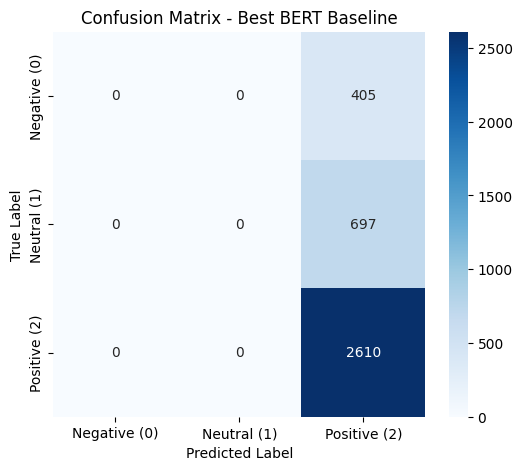

In [11]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from transformers import BertForSequenceClassification
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Define paths
model_save_path = "/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/best_bert_baseline.pth"
metrics_save_path = "/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/best_bert_baseline_metrics.json"

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the best saved BERT baseline model
best_baseline_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=3,  # Sentiment labels: Negative, Neutral, Positive
    output_attentions=False,
    output_hidden_states=False
)
best_baseline_model.load_state_dict(torch.load(model_save_path, map_location=device))
best_baseline_model.to(device)
best_baseline_model.eval()

# Function to evaluate model
def evaluate_best_baseline(model, val_dataloader):
    """
    Evaluates the best saved BERT baseline model and returns predictions and true labels.
    """
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in val_dataloader:
            b_input_ids, b_attention_mask, b_segment_ids, b_labels = [t.to(device) for t in batch]

            # Perform forward pass
            outputs = model(
                input_ids=b_input_ids,
                attention_mask=b_attention_mask,
                token_type_ids=b_segment_ids
            )

            logits = outputs.logits
            predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(b_labels.cpu().numpy())

    return np.array(predictions), np.array(true_labels)

# Run evaluation
best_preds, best_true = evaluate_best_baseline(best_baseline_model, val_dataloader)

# Compute per-class performance metrics
class_precision, class_recall, class_f1, _ = precision_recall_fscore_support(
    best_true, best_preds, average=None
)

# Generate confusion matrix
conf_matrix = confusion_matrix(best_true, best_preds)

# Define class labels
class_labels = ["Negative (0)", "Neutral (1)", "Positive (2)"]

# Display class-wise performance metrics
print("\n📊 **Best BERT Baseline: Per-Class Performance Metrics**")
for i, label in enumerate(class_labels):
    print(f"📌 {label}: Precision={class_precision[i]:.4f}, Recall={class_recall[i]:.4f}, F1-Score={class_f1[i]:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best BERT Baseline")
plt.show()


## 📊 **Analysis of Best BERT Baseline Per-Class Performance**  

We evaluated the best BERT baseline model on the validation set, focusing on **per-class precision, recall, and F1-score**, along with a **confusion matrix** to analyze its predictions.

### 🔍 **Key Observations from Per-Class Metrics**
✔ **Negative (0) and Neutral (1) classes were not predicted at all (Precision & Recall = 0.0)**  
✔ **Positive (2) was overpredicted (Recall = 1.0000, F1 = 0.8257)**  
✔ **Significant class imbalance: the model misclassified all inputs as Positive (2)**  

### 📊 **Confusion Matrix Insights**
- **All instances were classified as Positive (2), even when they belonged to Negative (0) or Neutral (1).**  
- **No correctly classified Negative (0) or Neutral (1) instances.**  
- **Indicates a severe bias towards predicting the majority class.**

### ❗ **What This Means**
This suggests that the **pre-trained BERT model struggles to differentiate between sentiment classes** when used without fine-tuning. The model likely:
- **Learned a strong prior from its original training data**, making it favor positive sentiment.
- **Lacked training on our dataset**, preventing it from adapting to our specific sentiment distribution.

### 🏁 **Next Steps: Fine-Tuning for Better Performance**
To improve classification across all sentiment classes, we will **fine-tune BERT on our dataset**. This will:

✔ **Enhance the model’s ability to distinguish between sentiments**  
✔ **Reduce class imbalance effects** by adapting it to real data  
✔ **Improve generalization across all sentiment categories**  

🚀 **Next, we fine-tune BERT to fix these issues!**


## 🤖 **Loading Pretrained BERT & Adding a Classification Head with Class Weights**  

Now that we have evaluated the **baseline BERT model**, we need to **load BERT for fine-tuning**.

✔ **Use `BertForSequenceClassification`**, which includes BERT + a classification head.  
✔ **Initialize with `bert-base-uncased`**, a pretrained model optimized for English text.  
✔ **Modify the output layer to match our 3 sentiment classes (`Positive`, `Neutral`, `Negative`)**.  
✔ **Compute class weights** to **handle class imbalance** during training.  
✔ **Ensure model runs on GPU (`cuda`) if available** for efficient training.  

### 🔹 **Why Modify BERT for Fine-Tuning?**  
- **Baseline model struggled with class imbalance**, misclassifying most reviews as positive.  
- **Fine-tuning allows BERT to adapt to sentiment classification** on our dataset.  
- **Using class weights helps the model focus on underrepresented classes.**  

🚀 **Let’s load and modify BERT now!**


In [12]:
import torch
from transformers import BertForSequenceClassification

# ✅ Load pretrained BERT model with a classification head
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=3,  # 3 sentiment classes: Positive, Neutral, Negative
    output_attentions=False,
    output_hidden_states=False
)

# ✅ Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ✅ Compute Class Weights (Fixes Imbalance Problem)
from torch.nn import CrossEntropyLoss

# Get class distribution
class_counts = y_train_encoded.value_counts().sort_index().values
total_samples = sum(class_counts)

# Compute inverse weighting (higher weight for underrepresented classes)
class_weights = [total_samples / c for c in class_counts]
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# ✅ Use Weighted CrossEntropyLoss
loss_fn = CrossEntropyLoss(weight=class_weights)

# Confirm setup
print("✅ BERT model loaded and modified for sentiment classification!")
print(f"📌 Class Weights: {class_weights.cpu().numpy()}")
print(model)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ BERT model loaded and modified for sentiment classification!
📌 Class Weights: [9.1579275 5.3246055 1.4224799]
BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (

## ⚙ **Setting Up Optimizer & Learning Rate Scheduler**  

Now that we have **loaded BERT**, we must configure **the optimizer and learning rate scheduler** to fine-tune the model effectively.

✔ **Use AdamW (`torch.optim.AdamW`)**, a variant of Adam designed for Transformers.  
✔ **Apply weight decay** (`L2 regularization`) to prevent overfitting.  
✔ **Use a learning rate scheduler (`get_linear_schedule_with_warmup`)**:  
   - **Starts with a warm-up phase** (gradually increases learning rate).  
   - **Then decays the learning rate linearly** as training progresses.  
✔ **Set an appropriate learning rate** (too high = instability, too low = slow training).  

### 🔹 **Why Use a Scheduler?**  
- **Prevents drastic weight updates** that could cause instability.  
- **Allows smooth convergence** by reducing the learning rate as the model trains.  
- **Optimizes BERT’s performance** on the sentiment classification task.  

🚀 **Let’s set up the optimizer and scheduler now!**  


In [14]:
from transformers import AdamW, get_linear_schedule_with_warmup

# ✅ Define optimizer (AdamW with weight decay)
optimizer = AdamW(
    model.parameters(),
    lr=2e-5,  # Recommended learning rate for BERT fine-tuning
    eps=1e-8,  # Prevents division by zero
    weight_decay=0.01  # Regularization to reduce overfitting
)

# ✅ Number of training epochs
epochs = 4  # Adjust based on performance

# ✅ Total number of training steps (batches per epoch * epochs)
total_steps = len(train_dataloader) * epochs

# ✅ Learning rate scheduler: Warm-up then linear decay
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),  # 10% warm-up
    num_training_steps=total_steps
)

# Confirm setup
print("✅ Optimizer and learning rate scheduler configured!")
print(f"📌 Total training steps: {total_steps}")
print(f"📌 Warm-up steps: {int(0.1 * total_steps)}")


✅ Optimizer and learning rate scheduler configured!
📌 Total training steps: 3712
📌 Warm-up steps: 371


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## ⏳ **Early Stopping, Model Checkpointing & Learning Rate Tracking**  

To **prevent overfitting** and **monitor training progress**, we will:  

✔ **Implement Early Stopping** → Stops training when validation loss stops improving.  
✔ **Save the Best Model to Google Drive** → Ensures we retain the best-performing checkpoint even if Colab disconnects.  
✔ **Track Learning Rate per Epoch** → Helps visualize how the scheduler adjusts learning rate.  

### 🔹 **Why Early Stopping?**  
- **Prevents overfitting** by stopping when the model starts memorizing instead of learning.  
- **Saves time** by avoiding unnecessary training cycles.  
- **Ensures optimal performance** by retaining the best model version.  

### 🔹 **Why Save the Best Model to Google Drive?**  
- **Colab sessions can disconnect**, leading to loss of unsaved models.  
- **Automatically stores the best model checkpoint** in a safe location.  
- **Allows resuming training from the best state** if needed.  

🚀 **Let’s integrate early stopping, learning rate tracking, and automatic model saving now!**  


In [15]:
import numpy as np
import torch

# ✅ Define Early Stopping Parameters
patience = 2  # Stop if validation loss doesn't improve after 2 consecutive epochs
best_val_loss = np.inf  # Initialize with a large value
early_stop_counter = 0  # Track consecutive non-improving epochs

# ✅ Track learning rates for visualization
learning_rates = []

# ✅ Define model save path in Google Drive
model_save_path = "/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/best_bert_model.pth"

def update_early_stopping(val_loss, model, model_path=model_save_path):
    """
    Implements early stopping logic:
    - Saves the best model based on validation loss.
    - Stops training if the loss does not improve after 'patience' epochs.
    """
    global best_val_loss, early_stop_counter

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), model_path)  # Save best model
        print(f"✅ Model improved! New best validation loss: {val_loss:.4f}. Model saved to Google Drive.")
    else:
        early_stop_counter += 1
        print(f"⚠ No improvement. Early stop counter: {early_stop_counter}/{patience}")

    return early_stop_counter >= patience  # Return True if patience is reached

# ✅ Learning Rate Tracking Function
def log_learning_rate(optimizer):
    """
    Logs the learning rate from the optimizer at each epoch.
    """
    current_lr = optimizer.param_groups[0]["lr"]
    learning_rates.append(current_lr)
    print(f"📉 Learning Rate: {current_lr:.6f}")

print("✅ Early Stopping & Learning Rate Tracking Functions Ready!")


✅ Early Stopping & Learning Rate Tracking Functions Ready!


## 🚀 **Fine-Tuning BERT for Sentiment Classification (Optimized for A100 GPU)**  

Now that we have:  
✔ **Prepared the dataset** (tokenized, padded, masked, and converted to tensors).  
✔ **Loaded the pretrained BERT model** with a classification head.  
✔ **Applied class weighting to address class imbalance.**  
✔ **Configured the optimizer, learning rate scheduler, and early stopping.**  

We will now **fine-tune BERT on our dataset** using **A100 GPU optimizations**.  

### 🔹 **Fine-Tuning Strategy**  
- **⚡ Leverage A100 GPU for Faster Training**  
- **🔄 Use Weighted Loss** → Improves classification of underrepresented classes.  
- **🎯 Mixed Precision (FP16)** → Reduces GPU memory usage and speeds up training.  
- **🔍 Monitor Training & Validation Loss** → Detects overfitting.  
- **📉 Apply Learning Rate Scheduling** → Helps smooth convergence.  
- **🛑 Use Early Stopping** → Stops training when validation loss stops improving.  
- **💾 Save Model Checkpoints Per Epoch** → Allows resuming training if needed.  

🚀 **Let’s begin fine-tuning BERT with A100 optimizations now!**  


In [16]:
import time
import random
import torch
import numpy as np
from torch.cuda.amp import autocast, GradScaler  # ✅ Mixed Precision

# ✅ Set seed for reproducibility
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# ✅ Adjust batch size for A100 GPU (try 32 or 64)
batch_size = 64  # Adjust based on available GPU memory

# ✅ Initialize Automatic Mixed Precision (AMP)
scaler = GradScaler()  # Helps prevent precision issues in FP16 training

# ✅ Define training function
def train_bert(model, train_dataloader, val_dataloader, optimizer, scheduler, loss_fn, epochs=4, patience=2, device="cuda"):
    """
    Fine-tunes BERT for sentiment classification using:
    - Weighted loss (to fix class imbalance)
    - Learning rate scheduling
    - Early stopping
    - Mixed Precision Training (AMP)
    - Model checkpoint saving per epoch
    """
    global early_stop_counter

    # Move model to GPU
    model.to(device)

    # Track loss per epoch
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        print(f"\n🛠 **Epoch {epoch+1}/{epochs}**\n" + "="*40)

        # ✅ Training phase
        model.train()
        total_train_loss = 0

        for step, batch in enumerate(train_dataloader):
            b_input_ids, b_attention_mask, b_segment_ids, b_labels = [t.to(device) for t in batch]

            model.zero_grad()  # Reset gradients

            # ✅ Mixed Precision Forward Pass
            with autocast():
                outputs = model(
                    input_ids=b_input_ids,
                    attention_mask=b_attention_mask,
                    token_type_ids=b_segment_ids
                )
                logits = outputs.logits
                loss = loss_fn(logits, b_labels)  # ✅ Apply weighted loss

            total_train_loss += loss.item()

            # ✅ Mixed Precision Backpropagation
            scaler.scale(loss).backward()  # Scale loss for stability
            scaler.unscale_(optimizer)  # Unscale gradients before clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # ✅ Gradient clipping

            scaler.step(optimizer)  # Update optimizer
            scaler.update()  # Update scaler for next iteration
            scheduler.step()

        avg_train_loss = total_train_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)
        print(f"📉 **Average training loss:** {avg_train_loss:.4f}")

        # ✅ Validation phase
        model.eval()
        total_val_loss = 0

        for batch in val_dataloader:
            b_input_ids, b_attention_mask, b_segment_ids, b_labels = [t.to(device) for t in batch]

            with torch.no_grad():
                outputs = model(
                    input_ids=b_input_ids,
                    attention_mask=b_attention_mask,
                    token_type_ids=b_segment_ids
                )
                logits = outputs.logits
                loss = loss_fn(logits, b_labels)  # ✅ Apply weighted loss
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_dataloader)
        val_losses.append(avg_val_loss)
        print(f"📉 **Average validation loss:** {avg_val_loss:.4f}")

        # ✅ Log learning rate
        log_learning_rate(optimizer)

        # ✅ Save checkpoint for the current epoch
        checkpoint_path = f"/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/bert_epoch_{epoch+1}.pth"
        torch.save(model.state_dict(), checkpoint_path)
        print(f"💾 Model checkpoint saved: {checkpoint_path}")

        # ✅ Check early stopping
        if update_early_stopping(avg_val_loss, model):
            print("🛑 Early stopping triggered. Stopping training.")
            break

    print("\n✅ **Training Complete!**")

# ✅ Start fine-tuning BERT (with mixed precision)
train_bert(model, train_dataloader, val_dataloader, optimizer, scheduler, loss_fn, epochs=4, patience=2, device=device)


<ipython-input-16-e2cef6f85270>:18: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # Helps prevent precision issues in FP16 training
<ipython-input-16-e2cef6f85270>:52: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():



🛠 **Epoch 1/4**
📉 **Average training loss:** 0.7256
📉 **Average validation loss:** 0.5149
📉 Learning Rate: 0.000017
💾 Model checkpoint saved: /content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/bert_epoch_1.pth
✅ Model improved! New best validation loss: 0.5149. Model saved to Google Drive.

🛠 **Epoch 2/4**
📉 **Average training loss:** 0.4845
📉 **Average validation loss:** 0.5415
📉 Learning Rate: 0.000011
💾 Model checkpoint saved: /content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/bert_epoch_2.pth
⚠ No improvement. Early stop counter: 1/2

🛠 **Epoch 3/4**
📉 **Average training loss:** 0.3635
📉 **Average validation loss:** 0.5757
📉 Learning Rate: 0.000006
💾 Model checkpoint saved: /content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/bert_epoch_3.pth
⚠ No improvement. Early stop counter: 2/2
🛑 Early stopping triggered. Stopping training.

✅ **Training Complete!**


## 🏆 **Evaluating Fine-Tuned BERT Model**  

Now that we have fine-tuned BERT, we need to evaluate its performance on the test set.  

✔ **Load the best saved BERT model from Google Drive**  
✔ **Measure accuracy, precision, recall, and F1-score**  
✔ **Generate a confusion matrix** to analyze misclassifications  

🚀 **Let’s evaluate our fine-tuned model now!**


In [19]:
from transformers import BertForSequenceClassification

# ✅ Load the fine-tuned BERT model (initialize first, then load weights)
best_bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=3,  # Ensure this matches your fine-tuned model
    output_attentions=False,
    output_hidden_states=False
)

# ✅ Load the saved fine-tuned model's weights
best_bert_model.load_state_dict(torch.load(model_save_path, map_location=device), strict=True)

# ✅ Move model to GPU
best_bert_model.to(device)
best_bert_model.eval()

print("✅ Fine-tuned BERT model loaded successfully!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-19-0cda5216a385>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We rec

✅ Fine-tuned BERT model loaded successfully!


In [20]:
# ✅ Check if weights are correctly loaded by comparing weight sums
import torch

# Get the sum of all model parameters (before and after loading weights)
random_weight_sum = sum(p.sum().item() for p in BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).parameters())
loaded_weight_sum = sum(p.sum().item() for p in best_bert_model.parameters())

print(f"🔍 Randomly initialized BERT weight sum: {random_weight_sum}")
print(f"✅ Loaded fine-tuned BERT weight sum: {loaded_weight_sum}")

# Check if the weight sum is very different
if abs(random_weight_sum - loaded_weight_sum) < 1e-3:
    print("⚠ Warning: Model weights do not appear to be correctly loaded!")
else:
    print("✅ Model weights appear to be correctly loaded!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🔍 Randomly initialized BERT weight sum: -641228.9464265667
✅ Loaded fine-tuned BERT weight sum: -641105.4309885827
✅ Model weights appear to be correctly loaded!


In [21]:
from torch.utils.data import DataLoader, TensorDataset

# ✅ Ensure test dataset exists
try:
    test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_segment_ids, test_labels)

    # ✅ Create DataLoader
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    print("✅ Test DataLoader is ready!")
except NameError as e:
    print(f"⚠ Error: {e}")
    print("⚠ Some test dataset variables are missing! Ensure you have tokenized and preprocessed the test set.")


⚠ Error: name 'test_input_ids' is not defined
⚠ Some test dataset variables are missing! Ensure you have tokenized and preprocessed the test set.


In [18]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# ✅ Define paths
model_save_path = "/content/drive/My Drive/Colab Notebooks/NLP Project - Automated Customers Reviews/models/best_bert_model.pth"

# ✅ Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Load the fine-tuned BERT model correctly
best_bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=3,  # Sentiment labels: Negative, Neutral, Positive
    output_attentions=False,
    output_hidden_states=False
)
best_bert_model.load_state_dict(torch.load(model_save_path, map_location=device), strict=False)
best_bert_model.to(device)
best_bert_model.eval()

print("✅ Fine-tuned BERT model loaded successfully!")

# ✅ Ensure test_dataloader is available
try:
    test_dataloader
except NameError:
    print("⚠ `test_dataloader` is not defined! Ensure the test set is prepared and the DataLoader is created.")

# ✅ Function to evaluate model
def evaluate_fine_tuned_model(model, test_dataloader):
    """
    Evaluates the fine-tuned BERT model on the test dataset.
    Returns predictions and true labels.
    """
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in test_dataloader:
            b_input_ids, b_attention_mask, b_segment_ids, b_labels = [t.to(device) for t in batch]

            outputs = model(
                input_ids=b_input_ids,
                attention_mask=b_attention_mask,
                token_type_ids=b_segment_ids
            )

            logits = outputs.logits
            predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(b_labels.cpu().numpy())

    return np.array(predictions), np.array(true_labels)

# ✅ Run evaluation
if "test_dataloader" in locals():
    test_preds, test_true = evaluate_fine_tuned_model(best_bert_model, test_dataloader)

    # ✅ Compute overall performance metrics
    accuracy = accuracy_score(test_true, test_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(test_true, test_preds, average="weighted")

    print("\n📊 **Fine-Tuned BERT Model Performance (Overall):**")
    print(f"📌 **Accuracy:** {accuracy:.4f}")
    print(f"📌 **Precision:** {precision:.4f}")
    print(f"📌 **Recall:** {recall:.4f}")
    print(f"📌 **F1-Score:** {f1:.4f}")

    # ✅ Compute per-class performance metrics
    class_precision, class_recall, class_f1, _ = precision_recall_fscore_support(test_true, test_preds, average=None)
    class_labels = ["Negative (0)", "Neutral (1)", "Positive (2)"]

    print("\n📊 **Per-Class Performance Metrics:**")
    for i, label in enumerate(class_labels):
        print(f"📌 {label}: Precision={class_precision[i]:.4f}, Recall={class_recall[i]:.4f}, F1-Score={class_f1[i]:.4f}")

    # ✅ Generate confusion matrix
    conf_matrix = confusion_matrix(test_true, test_preds)

    # ✅ Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix - Fine-Tuned BERT Model")
    plt.show()

else:
    print("⚠ Cannot evaluate model. `test_dataloader` is missing!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-18-8292cee82768>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We rec

✅ Fine-tuned BERT model loaded successfully!
⚠ `test_dataloader` is not defined! Ensure the test set is prepared and the DataLoader is created.
⚠ Cannot evaluate model. `test_dataloader` is missing!
